In [4]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

sid = SentimentIntensityAnalyzer()
lemma = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
def get_sentiment(filepath):
    df = pd.read_csv(filepath)
    
    df["full_text"] = df["title"] + " " + df["selftext"]
    df["sent_score"] = df["full_text"].apply(lambda review: sid.polarity_scores(review))
    df["compound"] = df["sent_score"].apply(lambda score_dict: score_dict["compound"])
    df["sentiment"] = df["compound"].apply(lambda c: "pos" if c > 0 else ("neu" if c == 0 else "neg"))
    
    return df

In [17]:
georgetown = get_sentiment("data/private/georgetown/georgetown_all_time.csv")
brown = get_sentiment("data/private/BrownU/BrownU_all_time.csv")
harvard = get_sentiment("data/private/Harvard/Harvard_all_time.csv")
upenn = get_sentiment("data/private/UPenn/UPenn_all_time.csv")
usc = get_sentiment("data/private/USC/USC_all_time.csv")
syracuse = get_sentiment("data/private/Syracuse/Syracuse_all_time.csv")
columbia = get_sentiment("data/private/columbia/columbia_all_time.csv")
mit = get_sentiment("data/private/mit/mit_all_time.csv")
notredame = get_sentiment("data/private/notredame/notredame_all_time.csv")
stanford = get_sentiment("data/private/stanford/stanford_all_time.csv")
yale = get_sentiment("data/private/yale/yale_all_time.csv")
bostonU = get_sentiment("data/private/BostonU/BostonU_all_time.csv")

private_unis = {
    'Georgetown':   georgetown,
    'Brown':        brown,
    'Harvard':      harvard,
    'Upenn':        upenn,
    'USC':          usc,
    'Syracuse':     syracuse,
    'Columbia':     columbia,
    'MIT':          mit,
    'Notredame':    notredame,
    'Stanford':     stanford,
    'Yale':         yale,
    'Boston':       bostonU
}


fsu = get_sentiment("data/public/FSU/FSU_all_time.csv")
gatech = get_sentiment("data/public/gatech/gatech_all_time.csv")
pennstate = get_sentiment("data/public/PennStateUniversity/PennStateUniversity_all_time.csv")
ucdavis = get_sentiment("data/public/UCDavis/UCDavis_all_time.csv")
uci = get_sentiment("data/public/UCI/UCI_all_time.csv")
ucla = get_sentiment("data/public/ucla/ucla_all_time.csv")
ucsantabarbara = get_sentiment("data/public/UCSantaBarbara/UCSantaBarbara_all_time.csv")
ucsc = get_sentiment("data/public/UCSC/UCSC_all_time.csv")
ucsd = get_sentiment("data/public/UCSD/UCSD_all_time.csv")
udub = get_sentiment("data/public/udub/udub_all_time.csv")
uofm = get_sentiment("data/public/uofm/uofm_all_time.csv")
utaustin = get_sentiment("data/public/UTAustin/UTAustin_all_time.csv")

In [10]:
barplot = lambda data, ax: (data
                            .groupby('created_utc')['sentiment']
                            .value_counts(normalize=True)
                            .mul(100)
                            .rename('percent')
                            .reset_index()
                            .pipe((sns.barplot,'data'), x='created_utc', y='percent', hue='sentiment', ax=ax))

def draw_percentages(ax):
    for p in ax.patches:
        x = p.get_x()
        y = p.get_height()
        if not np.isnan(y):
            pcr = str(p.get_height().round(2)) + '%'
        else:
            y = 0
            pcr = '0%'
        ax.text(x, y, pcr)


def countplot_per_year_per_uni(uni, uni_data, pcr=True):
    data = uni_data.copy()
    
    fig, ax = plt.subplots(figsize=(10,5))          # you can change the size here
    fig.suptitle(uni)

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    data.created_utc = data.created_utc.dt.strftime('%Y')
    barplot(data, ax)
    ax.set_xlabel('year')

    if pcr:
        draw_percentages(ax)
    

def countplot_per_month_per_year_per_uni(uni, uni_data, pcr=True):
    data = uni_data.copy()

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    groups = data.groupby(by=data.created_utc.dt.year)[['created_utc', 'sentiment']]

    fig, ax = plt.subplots(5, figsize=(15,15))      # you can change the size here
    fig.suptitle(uni + '\n')

    for i, (year, df) in enumerate(groups):
        df.created_utc = df.created_utc.dt.strftime('%B')
        barplot(df, ax[i])
        ax[i].set_title(year)
        ax[i].set_xlabel('')

        if pcr:
            draw_percentages(ax[i])    

    plt.tight_layout()

# $$PRIVATE$$

## $$GEORGETOWN$$

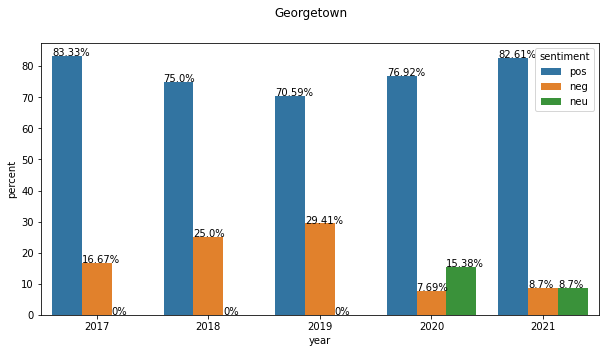

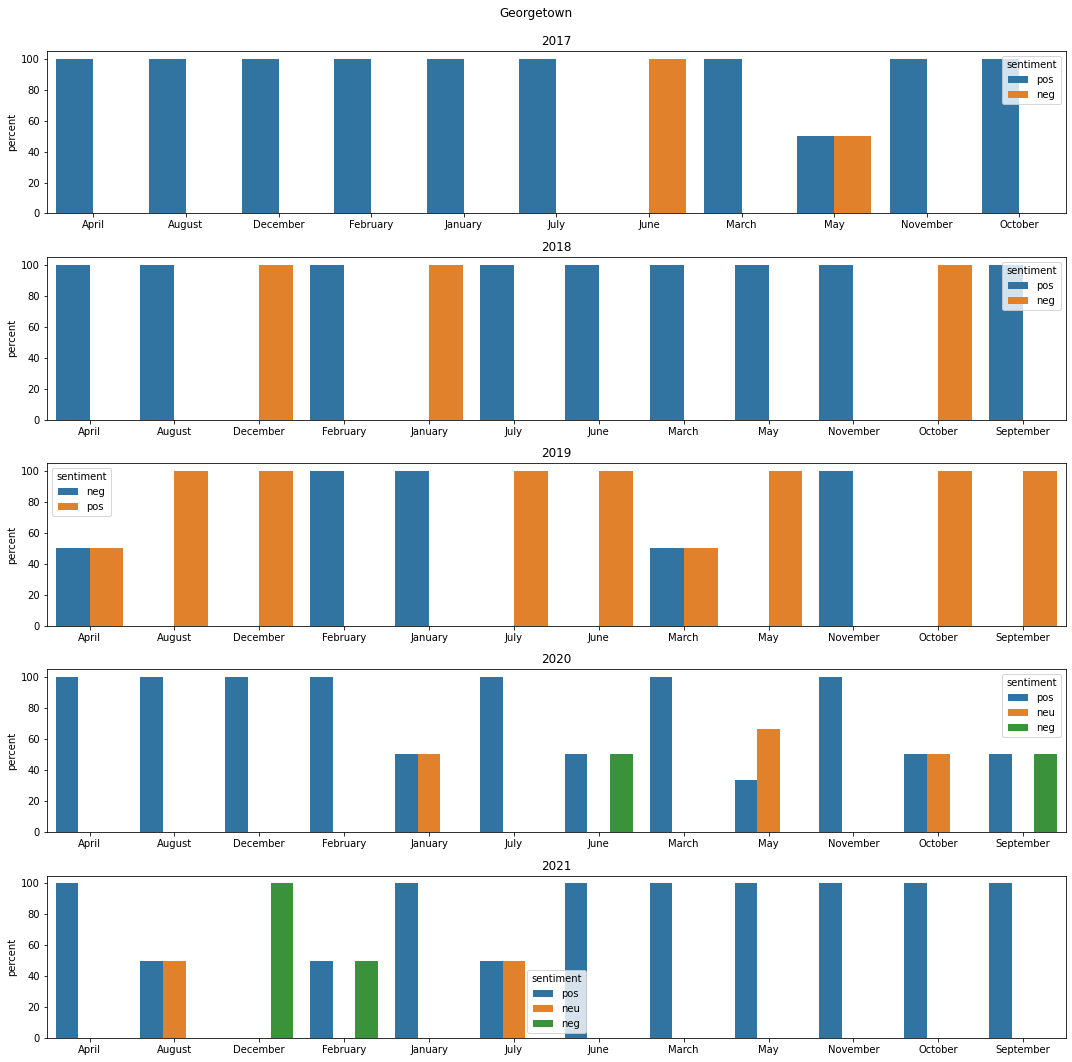

In [100]:
countplot_per_year_per_uni('Georgetown', georgetown)
countplot_per_month_per_year_per_uni('Georgetown', georgetown, pcr=False)

## $$ BROWN $$

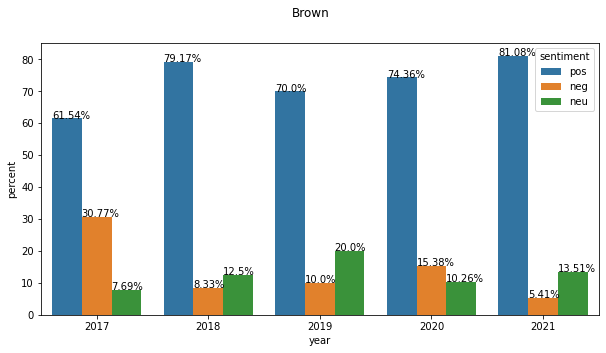

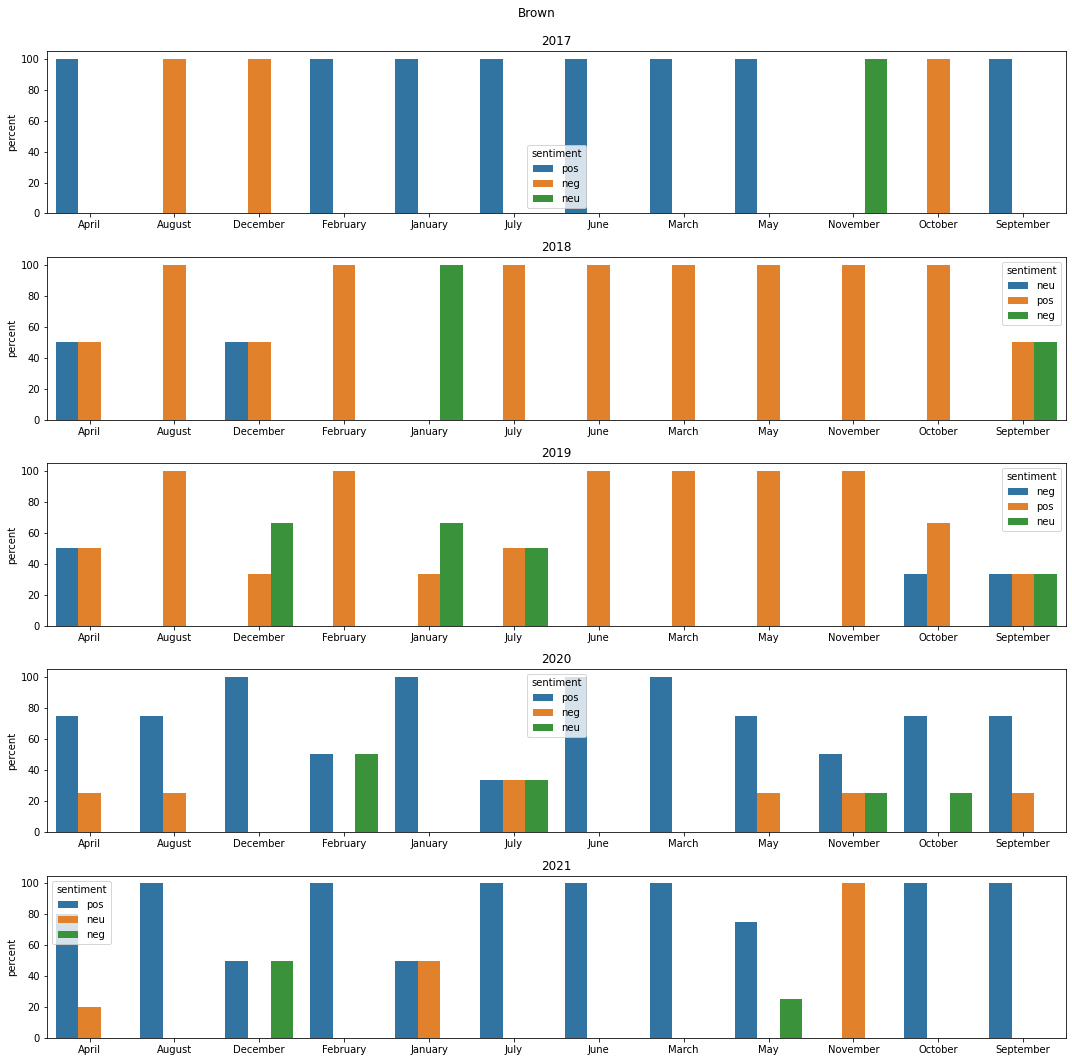

In [101]:
countplot_per_year_per_uni('Brown', brown)
countplot_per_month_per_year_per_uni('Brown', brown, pcr=False)

## $$ HARVARD $$

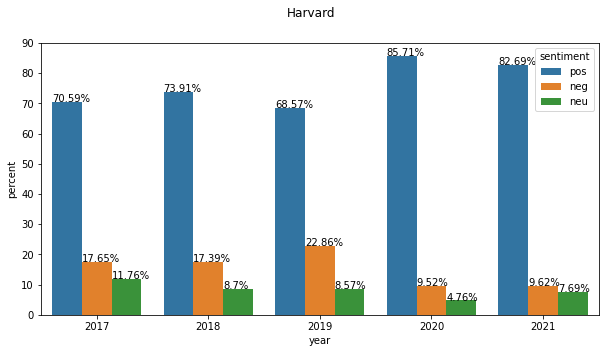

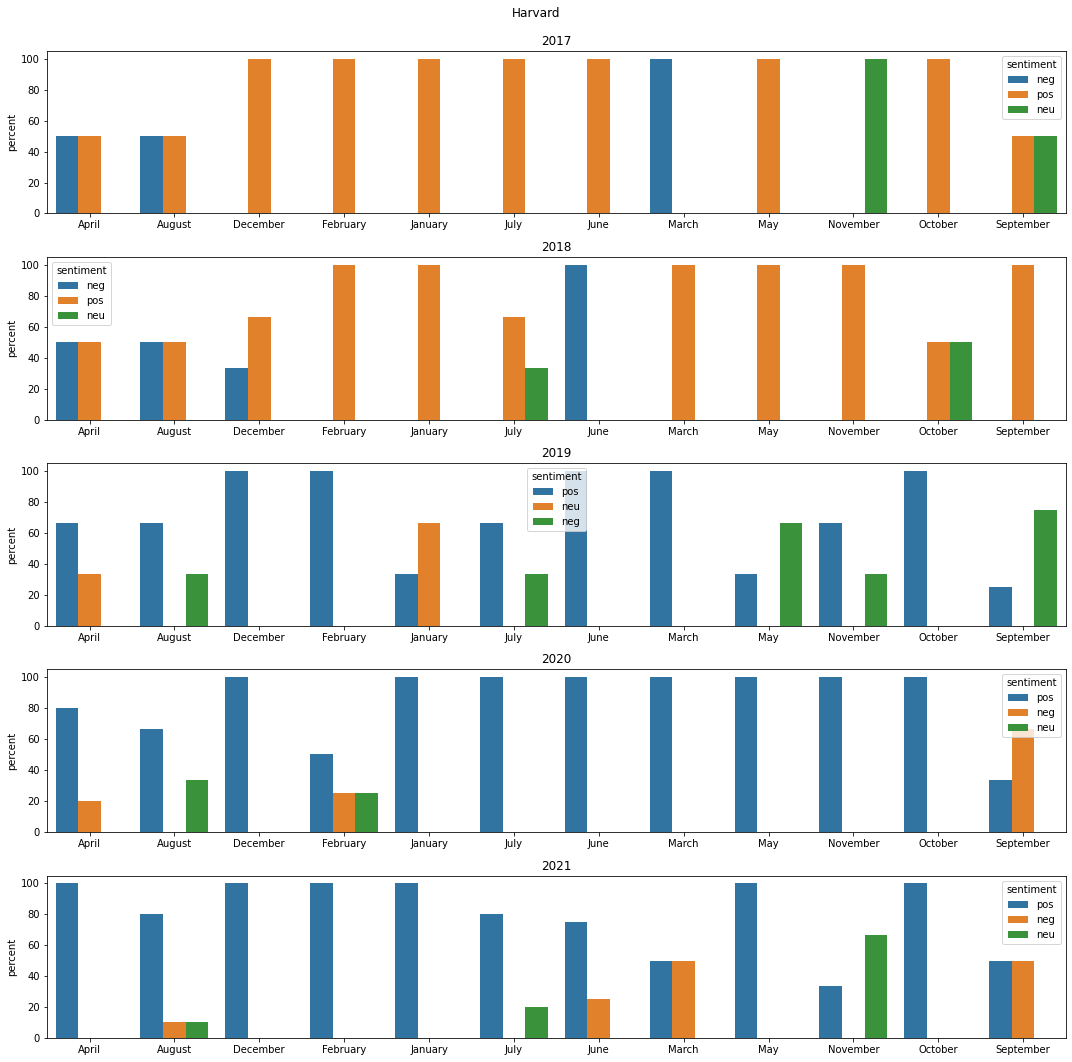

In [102]:
countplot_per_year_per_uni('Harvard', harvard)
countplot_per_month_per_year_per_uni('Harvard', harvard, pcr=False)

## $$ UPENN $$

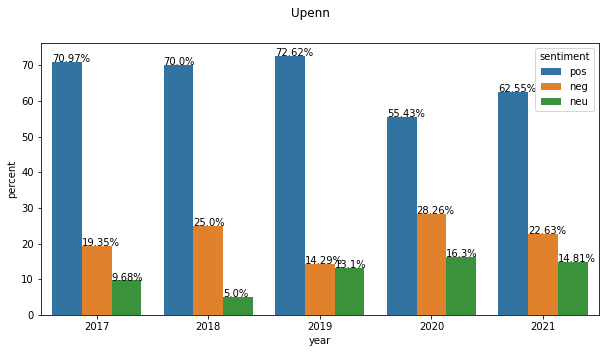

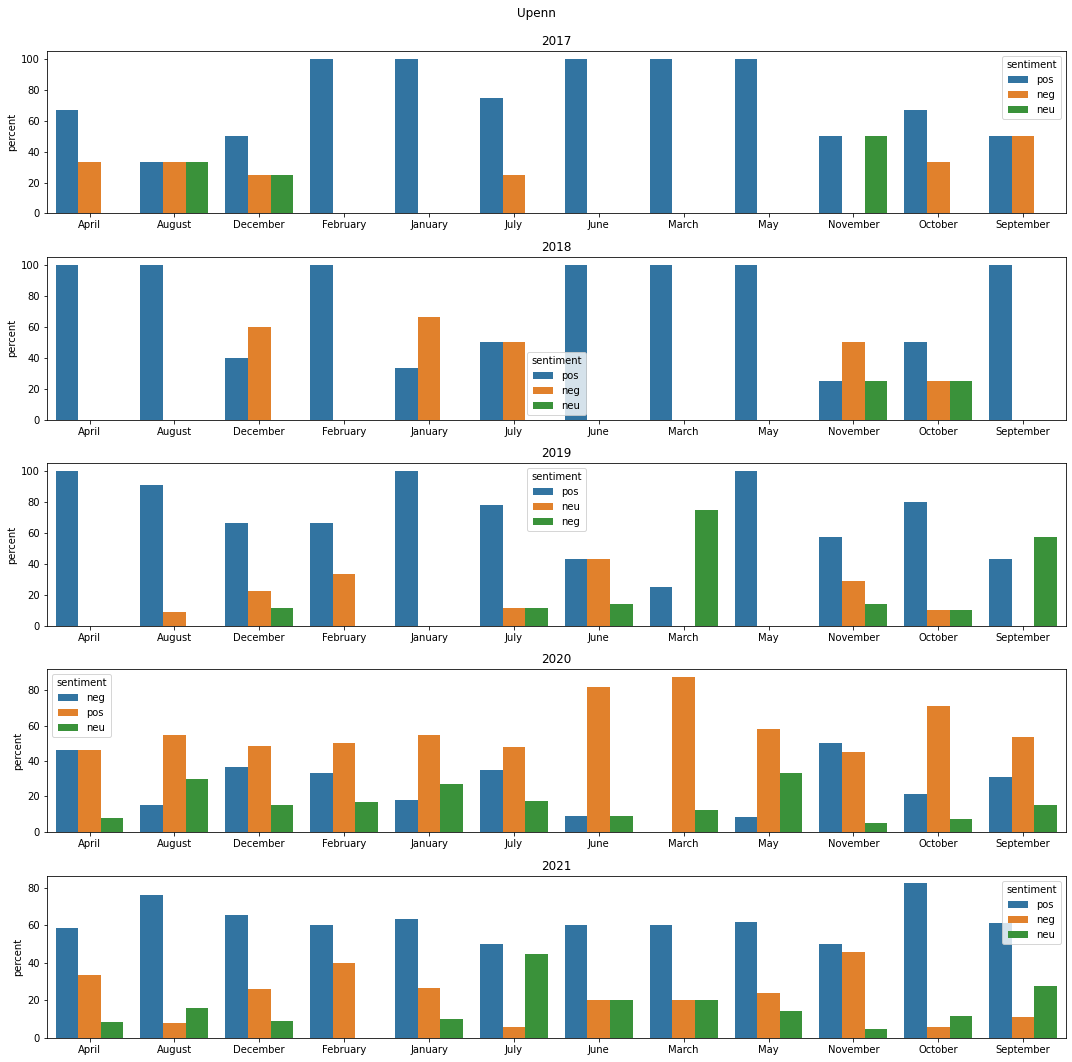

In [103]:
countplot_per_year_per_uni('Upenn', upenn)
countplot_per_month_per_year_per_uni('Upenn', upenn, pcr=False)

## $$ USC $$

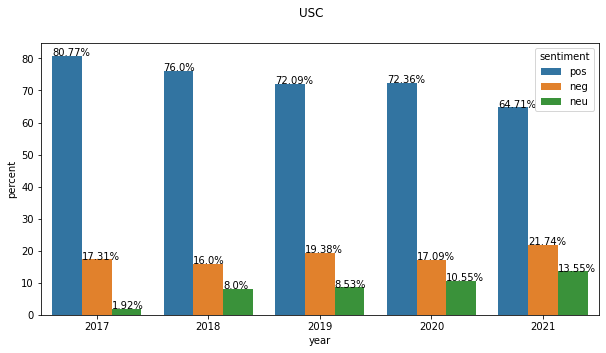

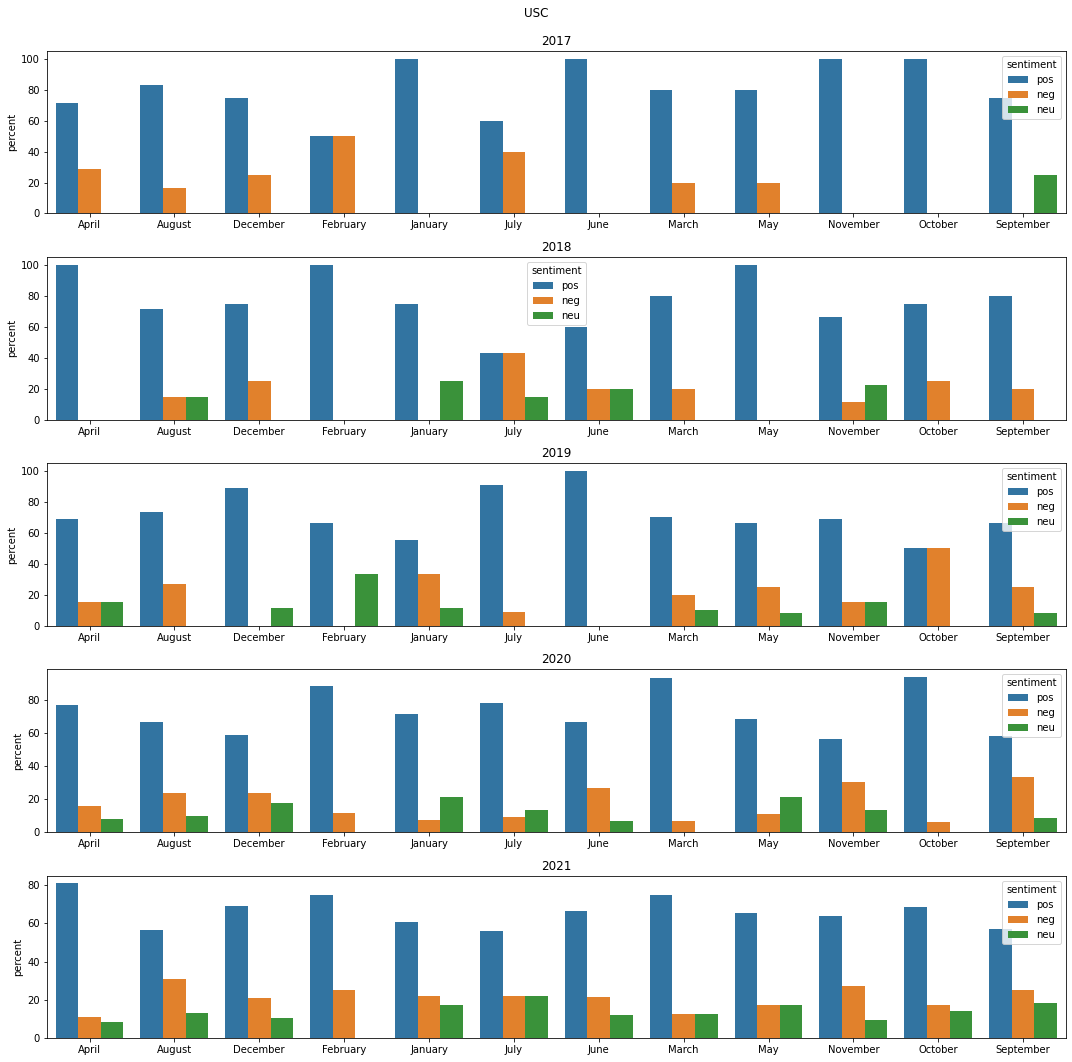

In [104]:
countplot_per_year_per_uni('USC', usc)
countplot_per_month_per_year_per_uni('USC', usc, pcr=False)

## $$ SYRACUSE $$

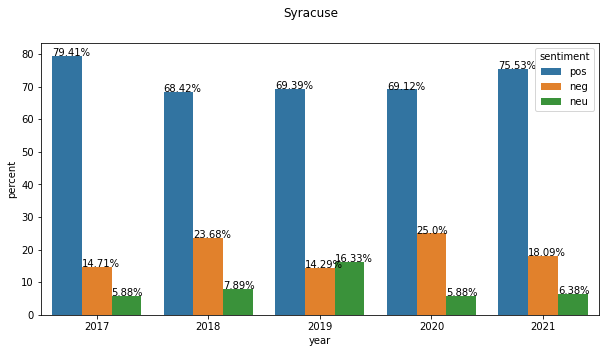

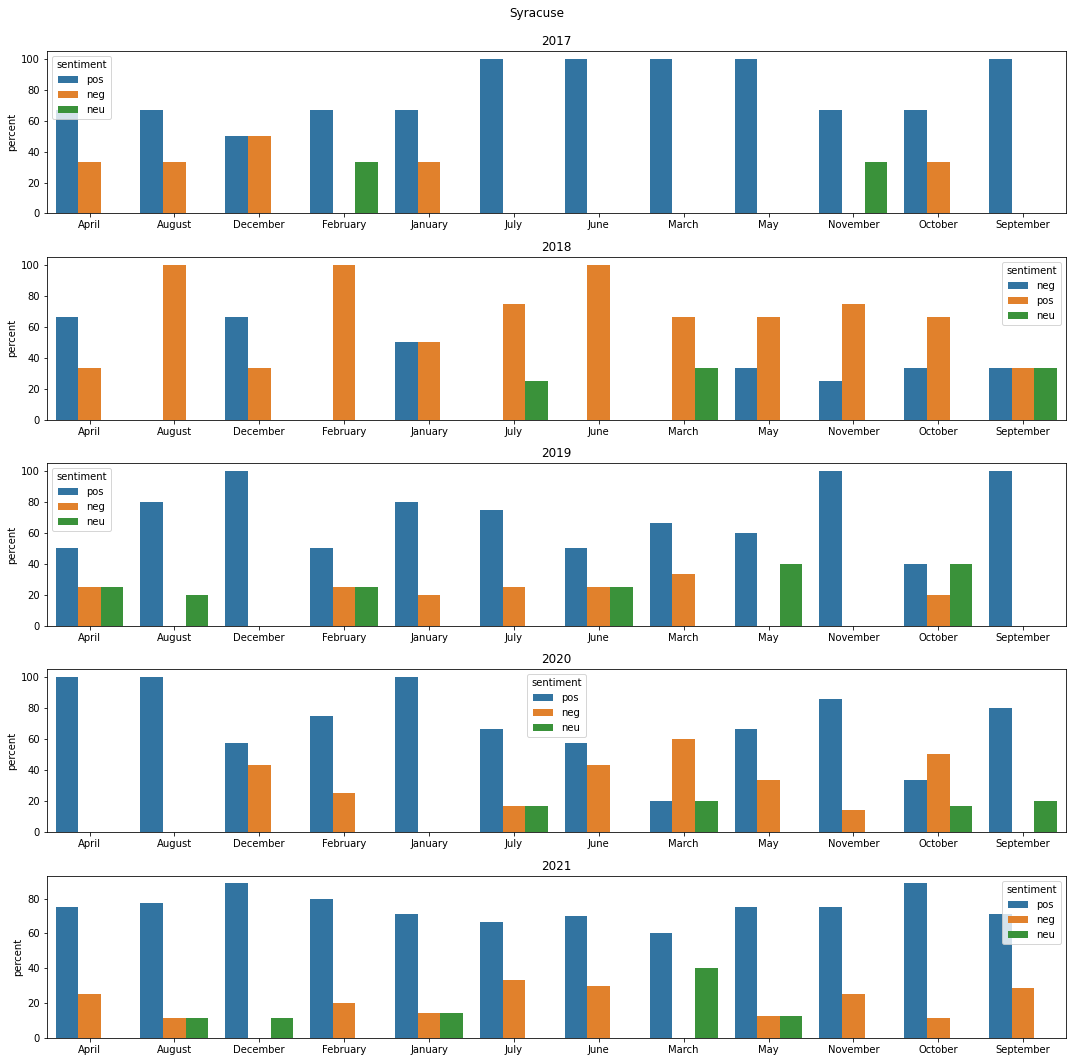

In [105]:
countplot_per_year_per_uni('Syracuse', syracuse)
countplot_per_month_per_year_per_uni('Syracuse', syracuse, pcr=False)

## $$ COLUMBIA $$

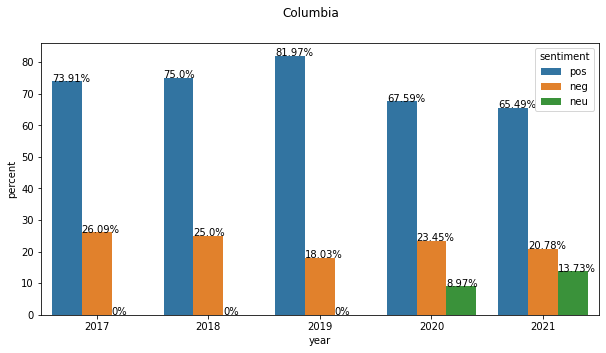

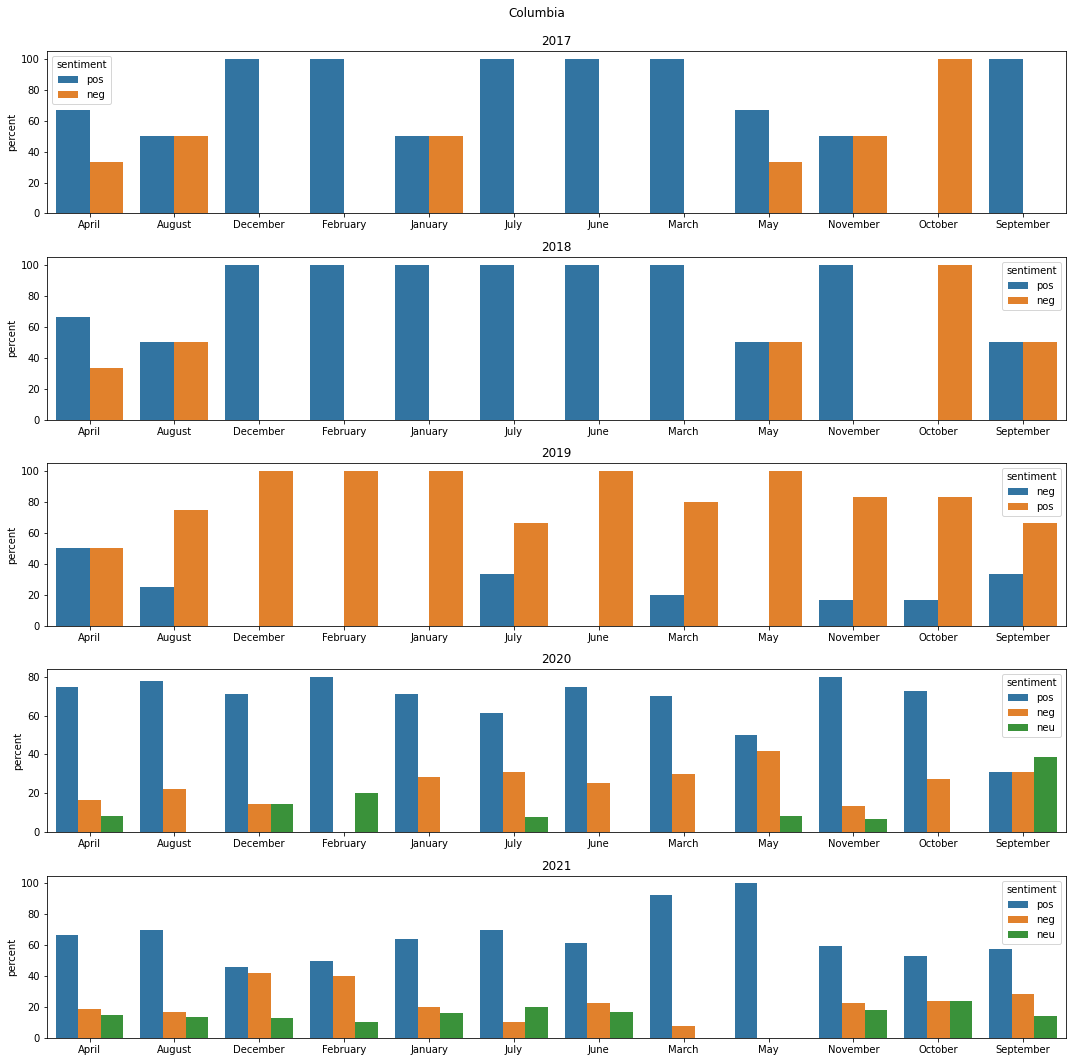

In [106]:
countplot_per_year_per_uni('Columbia', columbia)
countplot_per_month_per_year_per_uni('Columbia', columbia, pcr=False)

## $$ MIT $$

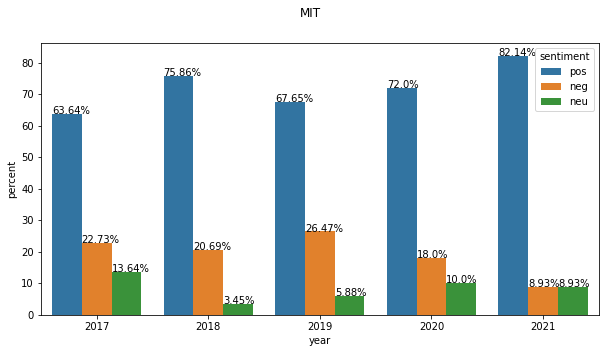

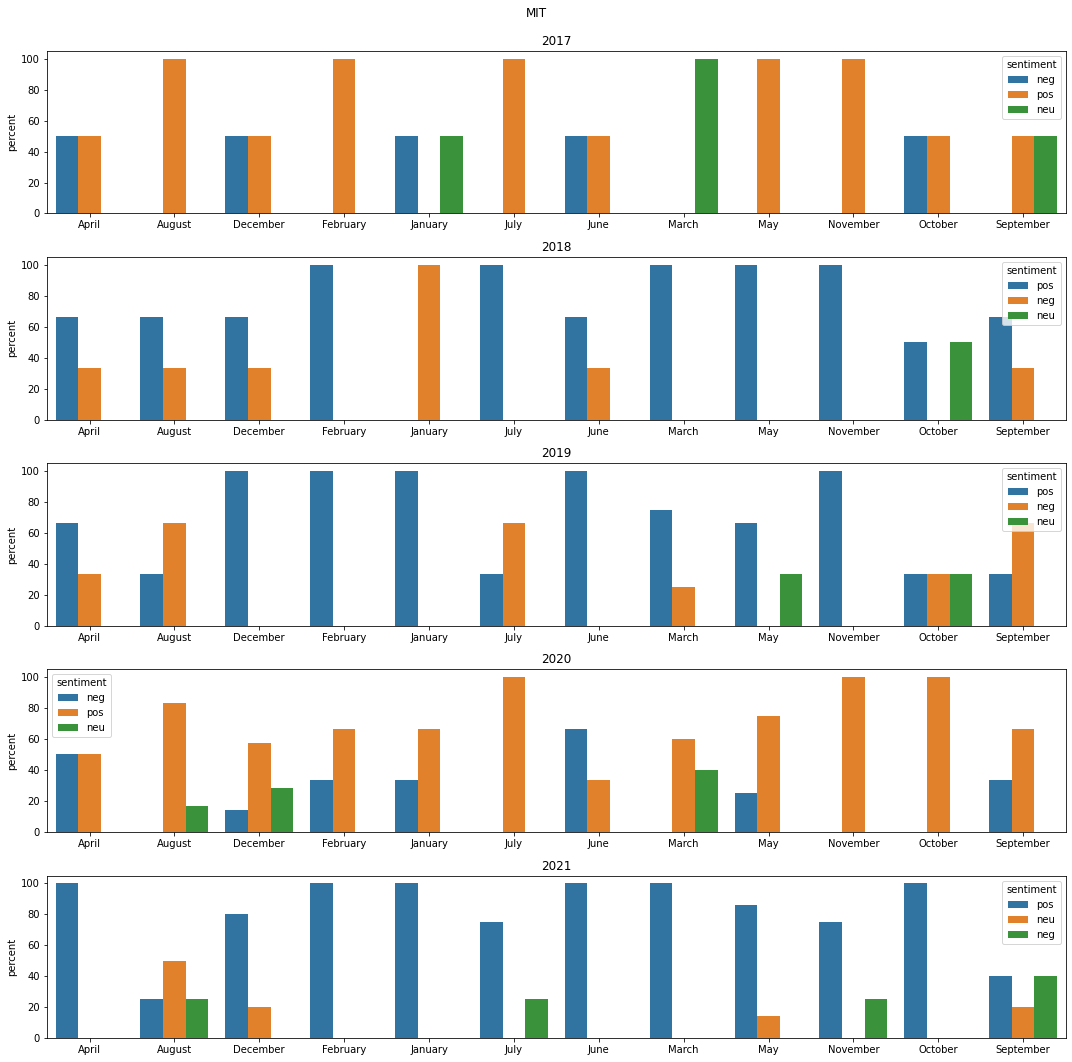

In [107]:
countplot_per_year_per_uni('MIT', mit)
countplot_per_month_per_year_per_uni('MIT', mit, pcr=False)

## $$ NOTREDAME $$

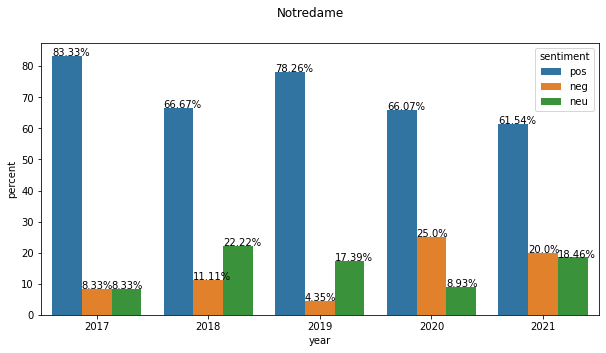

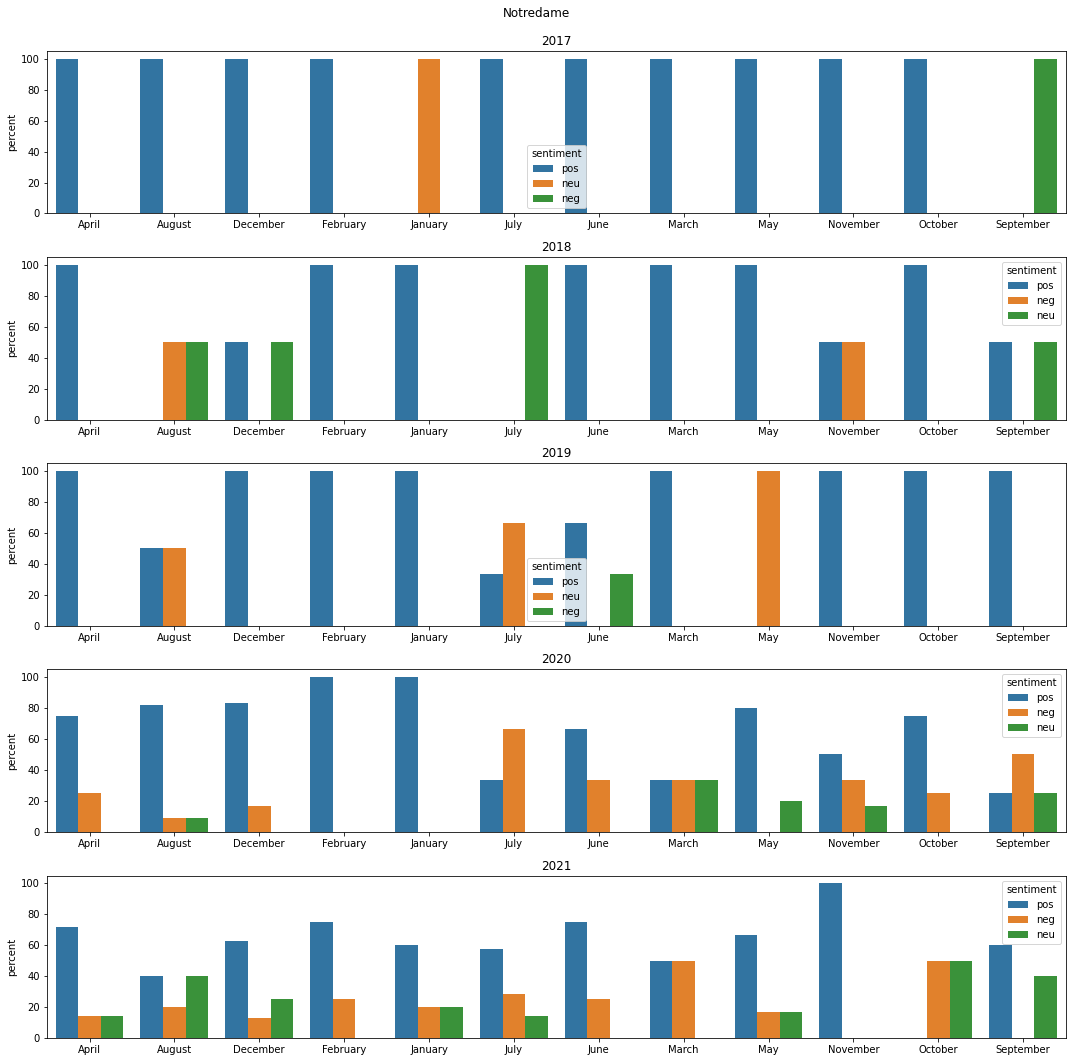

In [108]:
countplot_per_year_per_uni('Notredame', notredame)
countplot_per_month_per_year_per_uni('Notredame', notredame, pcr=False)

## $$ STANFORD $$

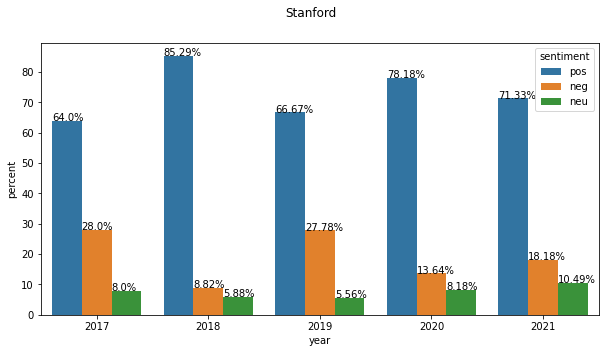

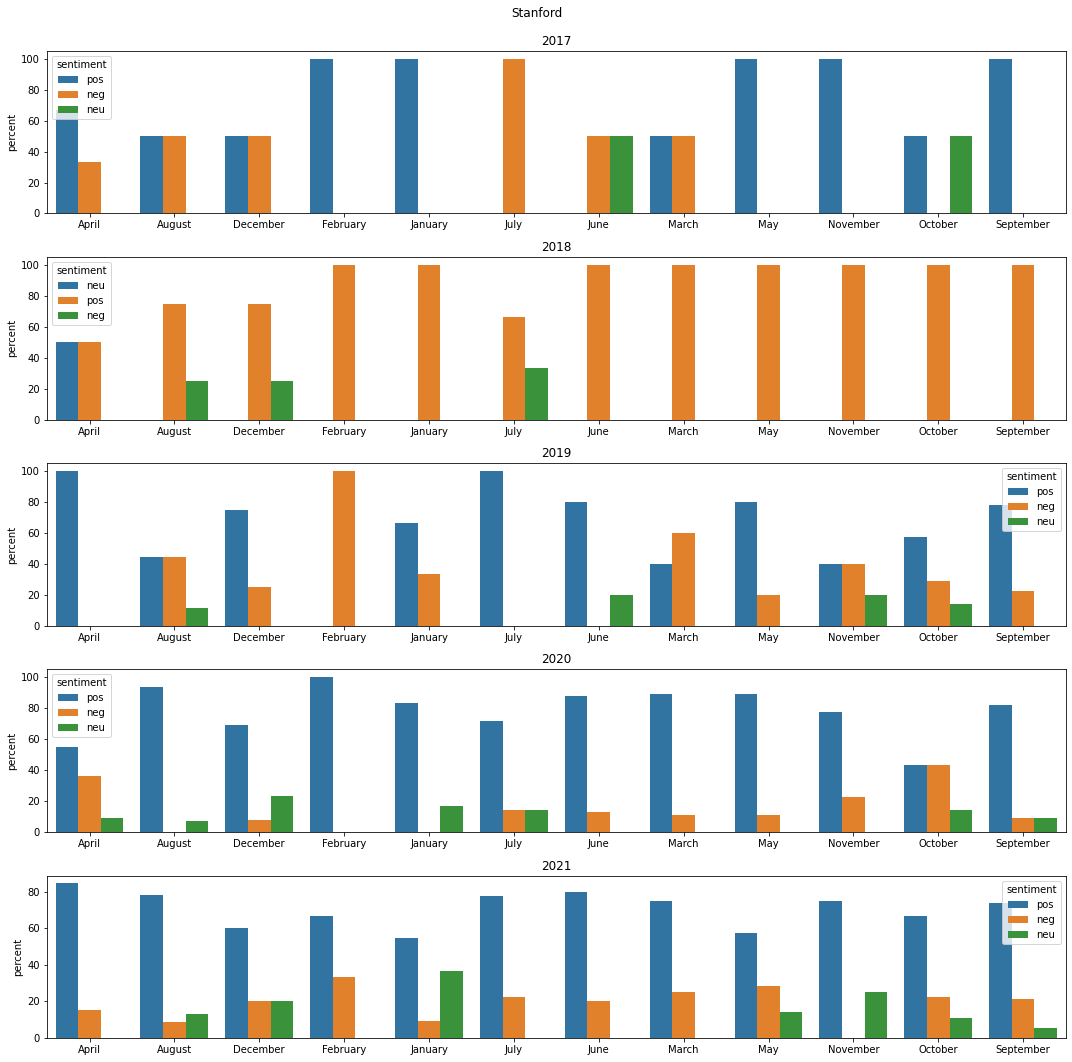

In [109]:
countplot_per_year_per_uni('Stanford', stanford)
countplot_per_month_per_year_per_uni('Stanford', stanford, pcr=False)

## $$ YALE $$

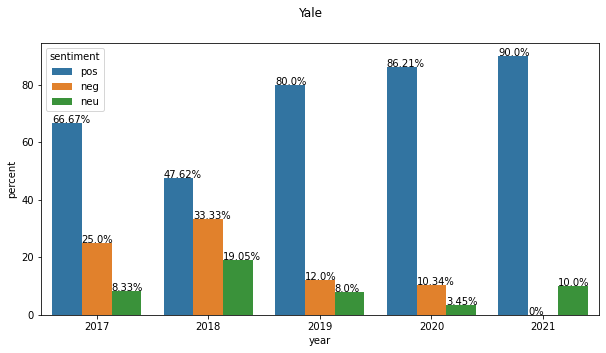

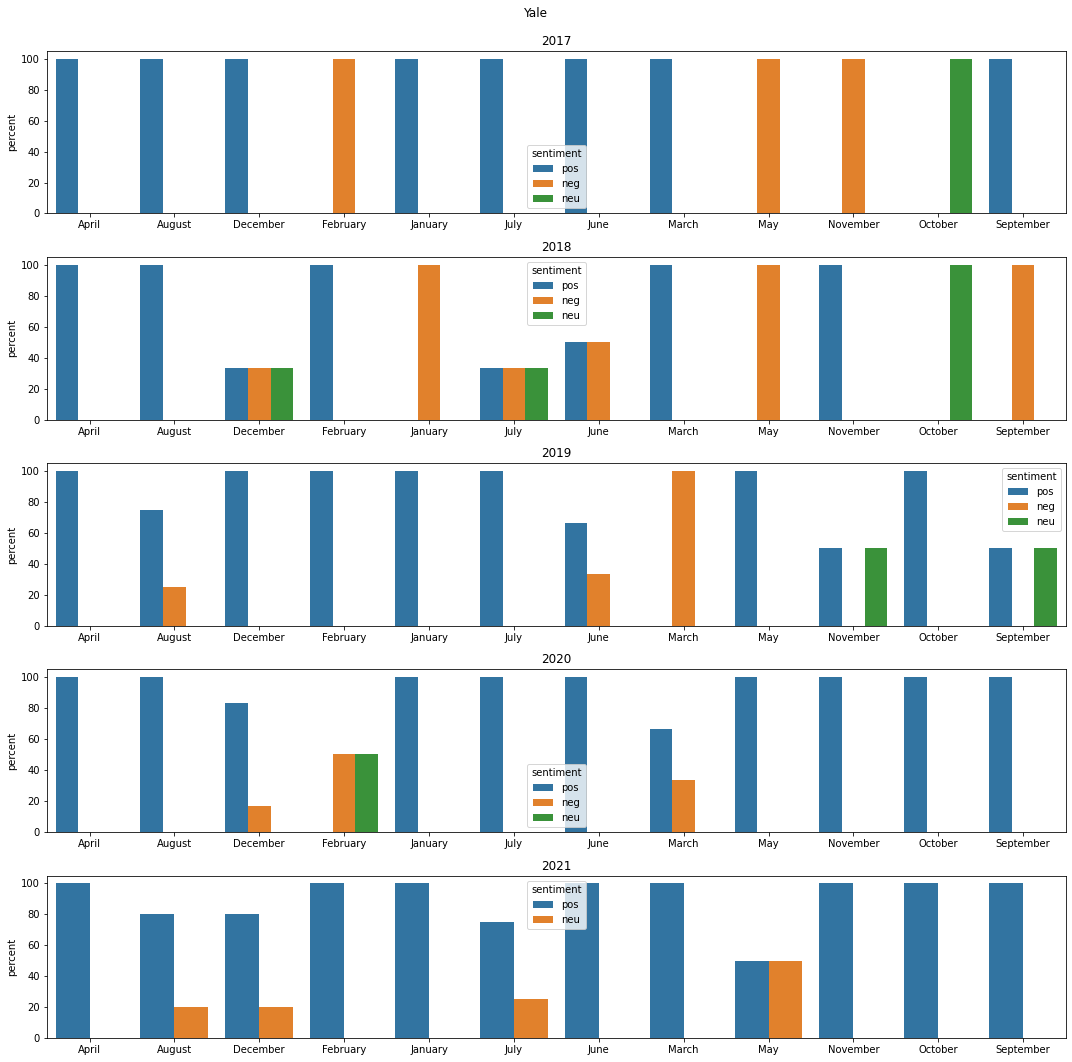

In [110]:
countplot_per_year_per_uni('Yale', yale)
countplot_per_month_per_year_per_uni('Yale', yale, pcr=False)

## $$ BOSTON $$

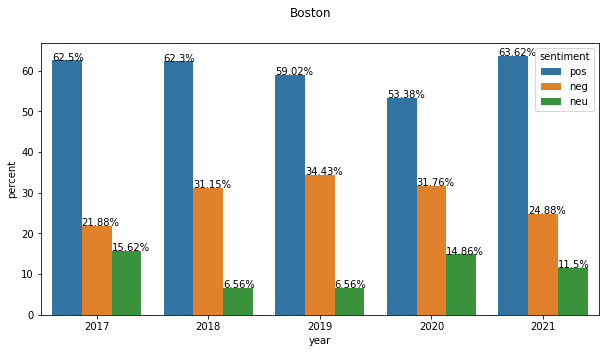

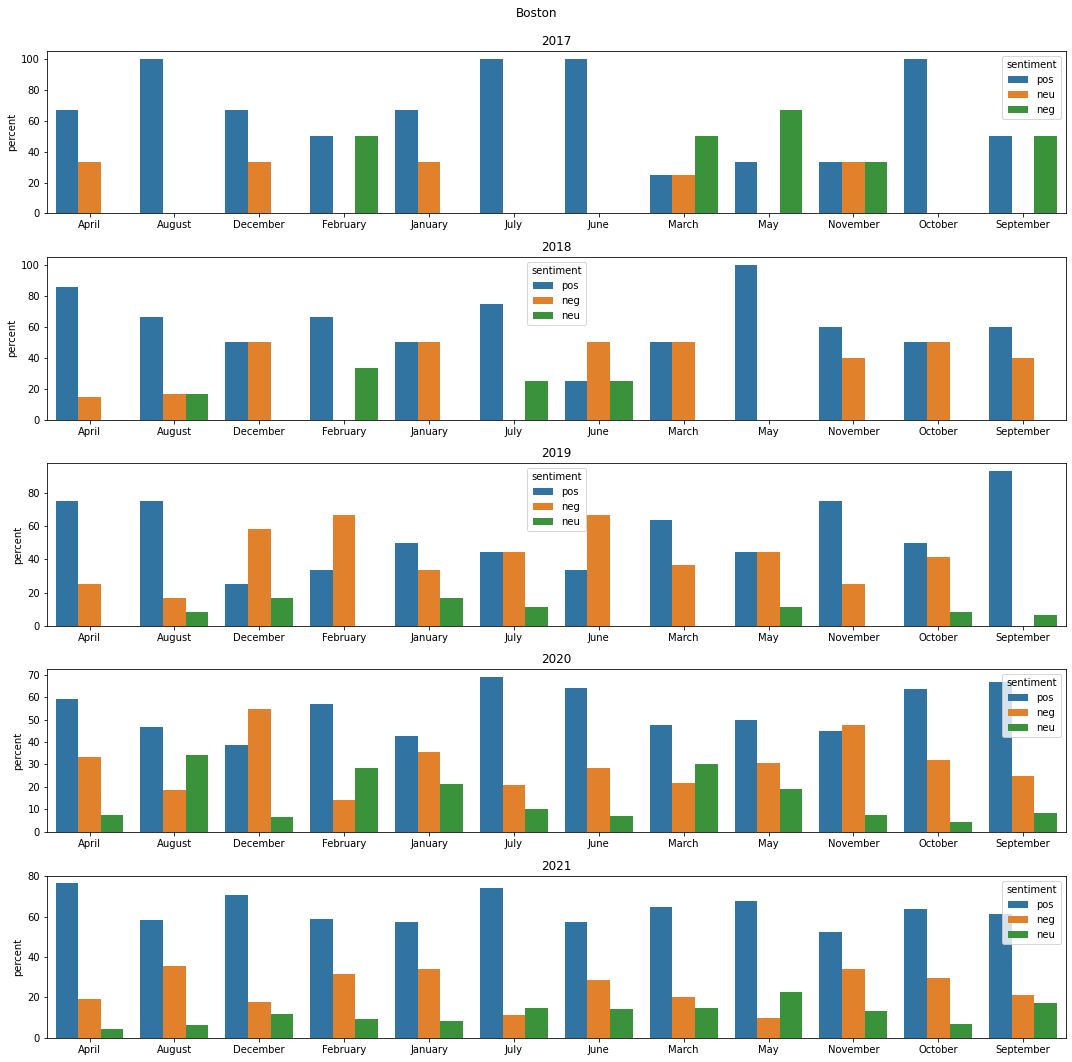

In [111]:
countplot_per_year_per_uni('Boston', bostonU)
countplot_per_month_per_year_per_uni('Boston', bostonU, pcr=False)

# $$PUBLIC$$

## $$FSU$$

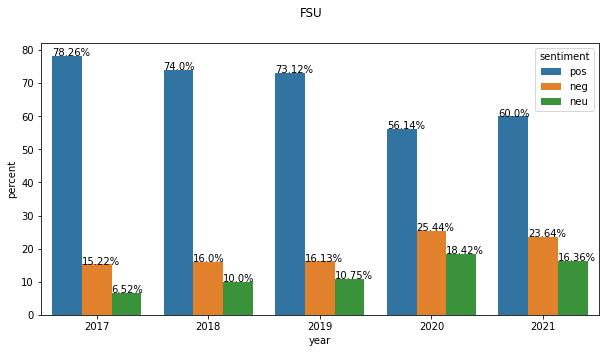

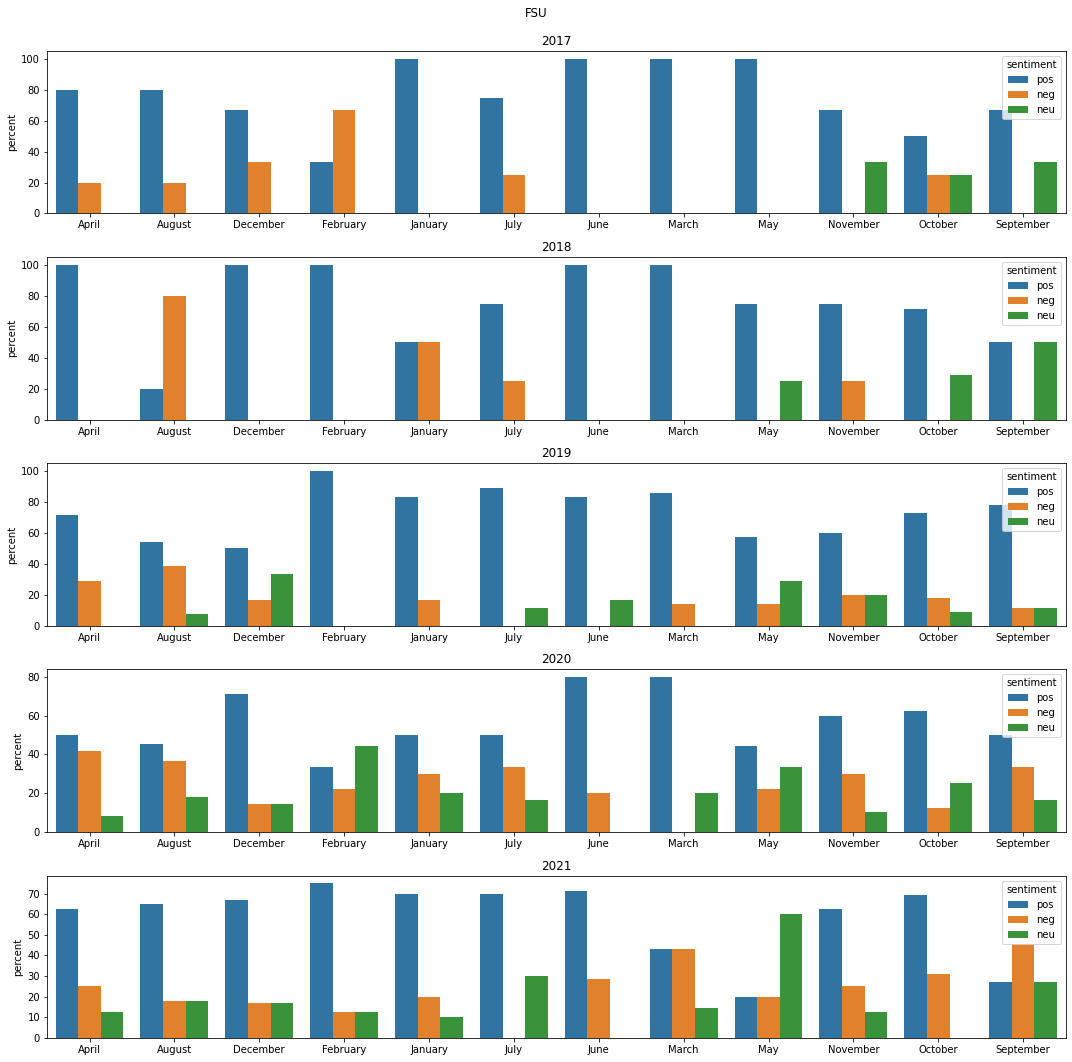

In [11]:
countplot_per_year_per_uni('FSU', fsu)
countplot_per_month_per_year_per_uni('FSU', fsu, pcr=False)

## $$GATECH$$

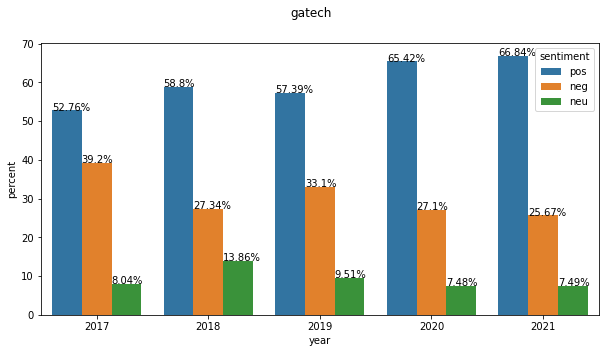

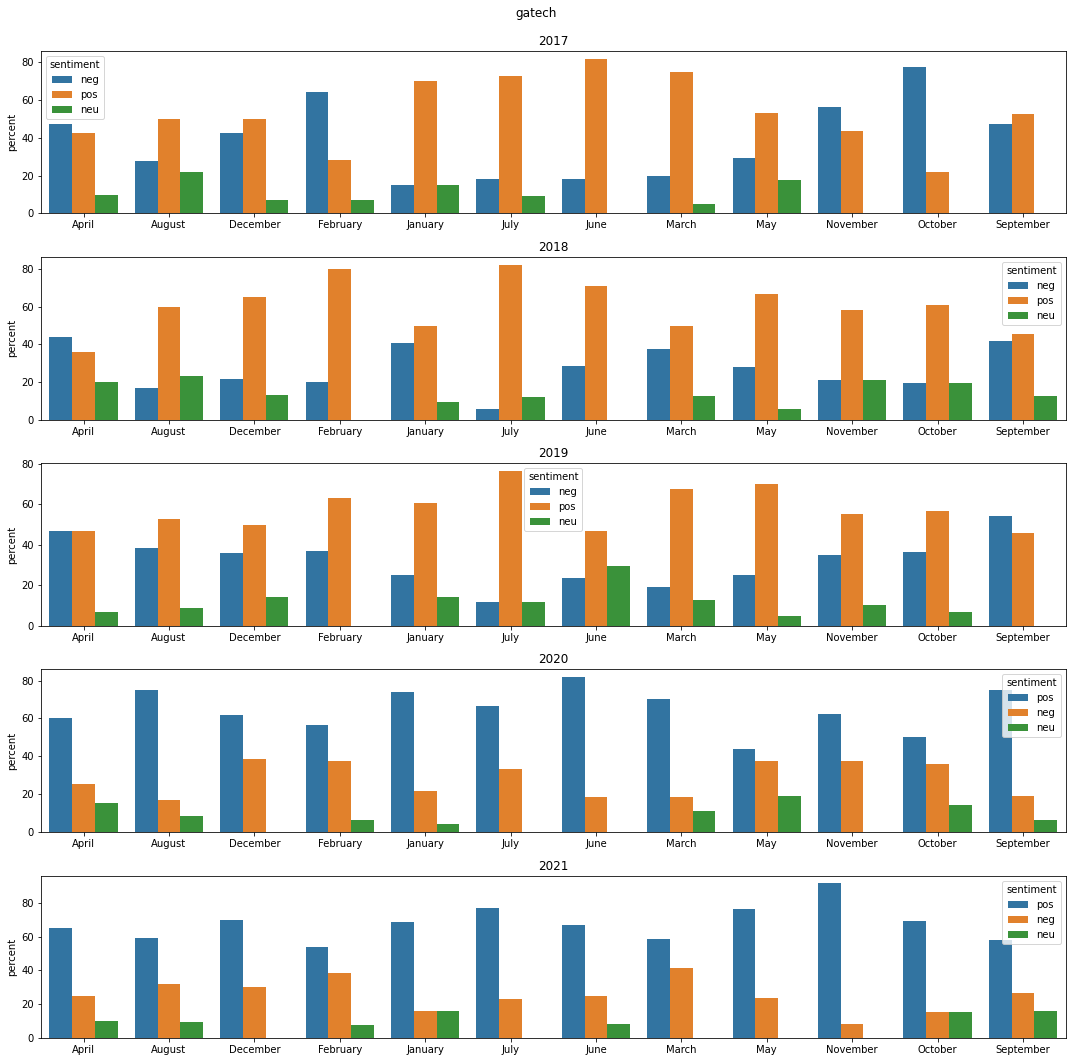

In [13]:
countplot_per_year_per_uni('gatech', gatech)
countplot_per_month_per_year_per_uni('gatech', gatech, pcr=False)

## $$PENNSTATE$$

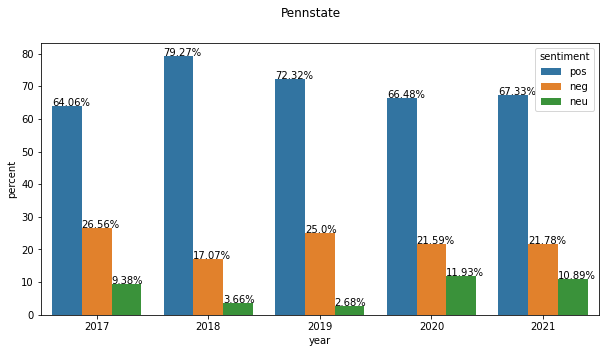

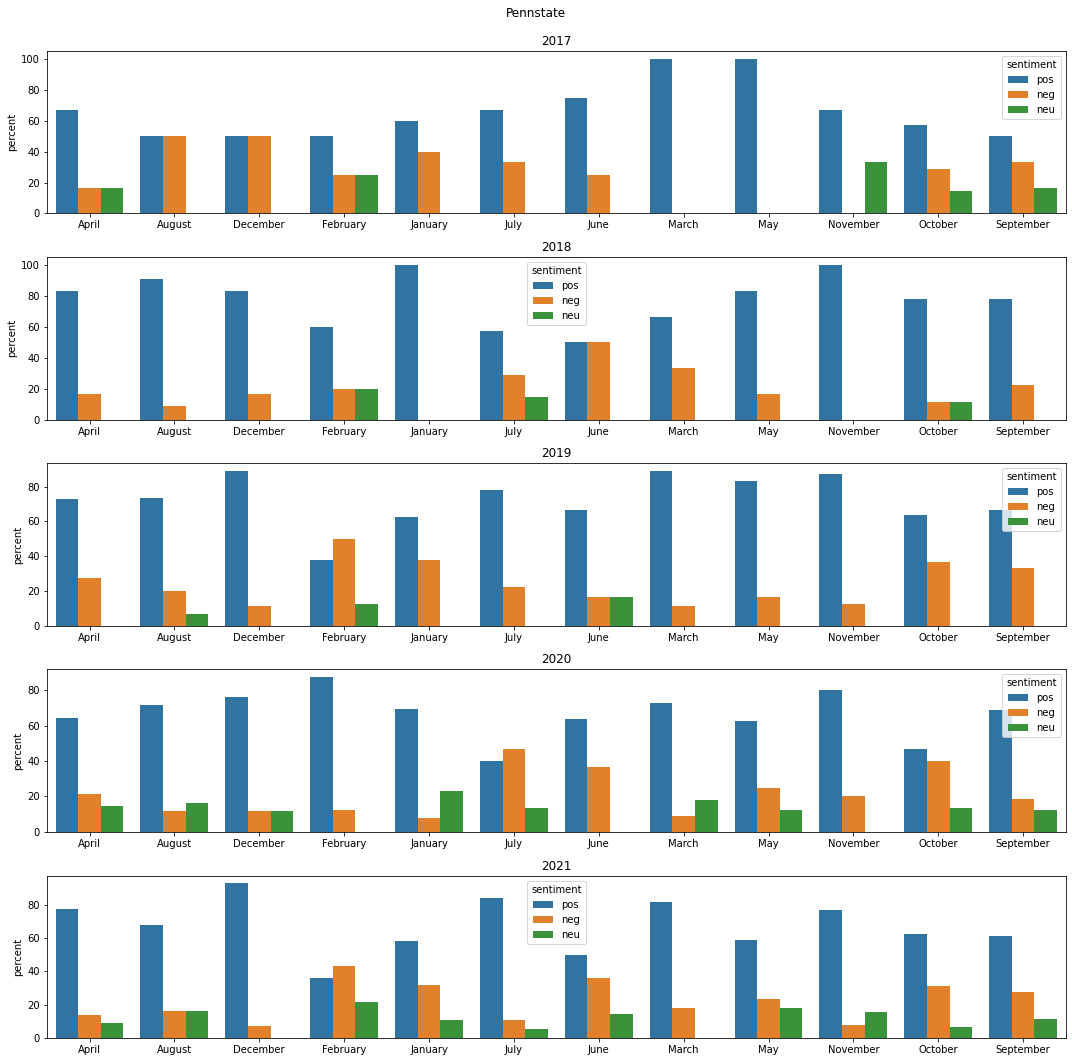

In [14]:
countplot_per_year_per_uni('Pennstate', pennstate)
countplot_per_month_per_year_per_uni('Pennstate', pennstate, pcr=False)

## $$UCDavis$$

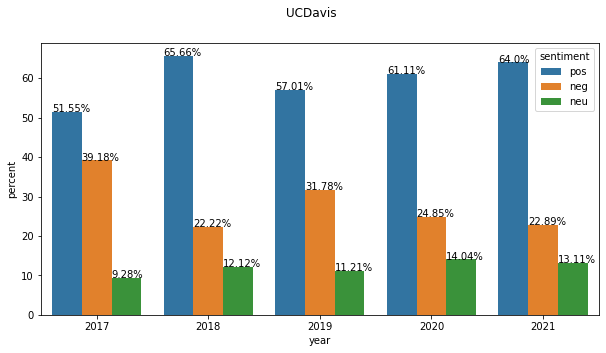

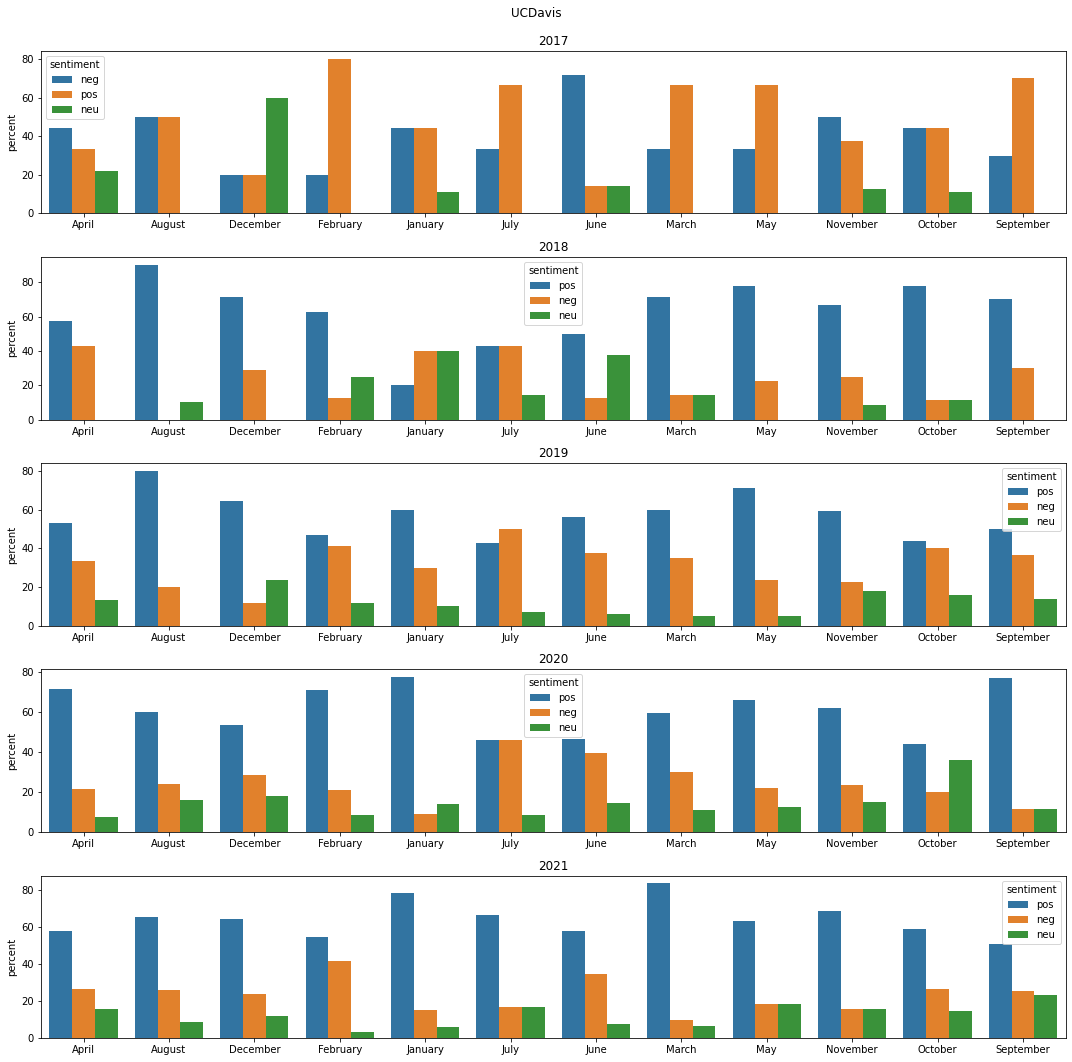

In [15]:
countplot_per_year_per_uni('UCDavis', ucdavis)
countplot_per_month_per_year_per_uni('UCDavis', ucdavis, pcr=False)

## $$UCI$$

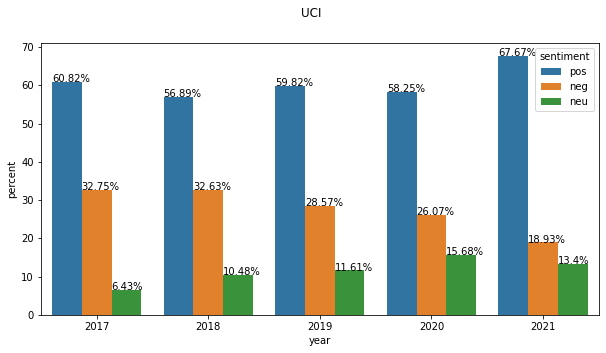

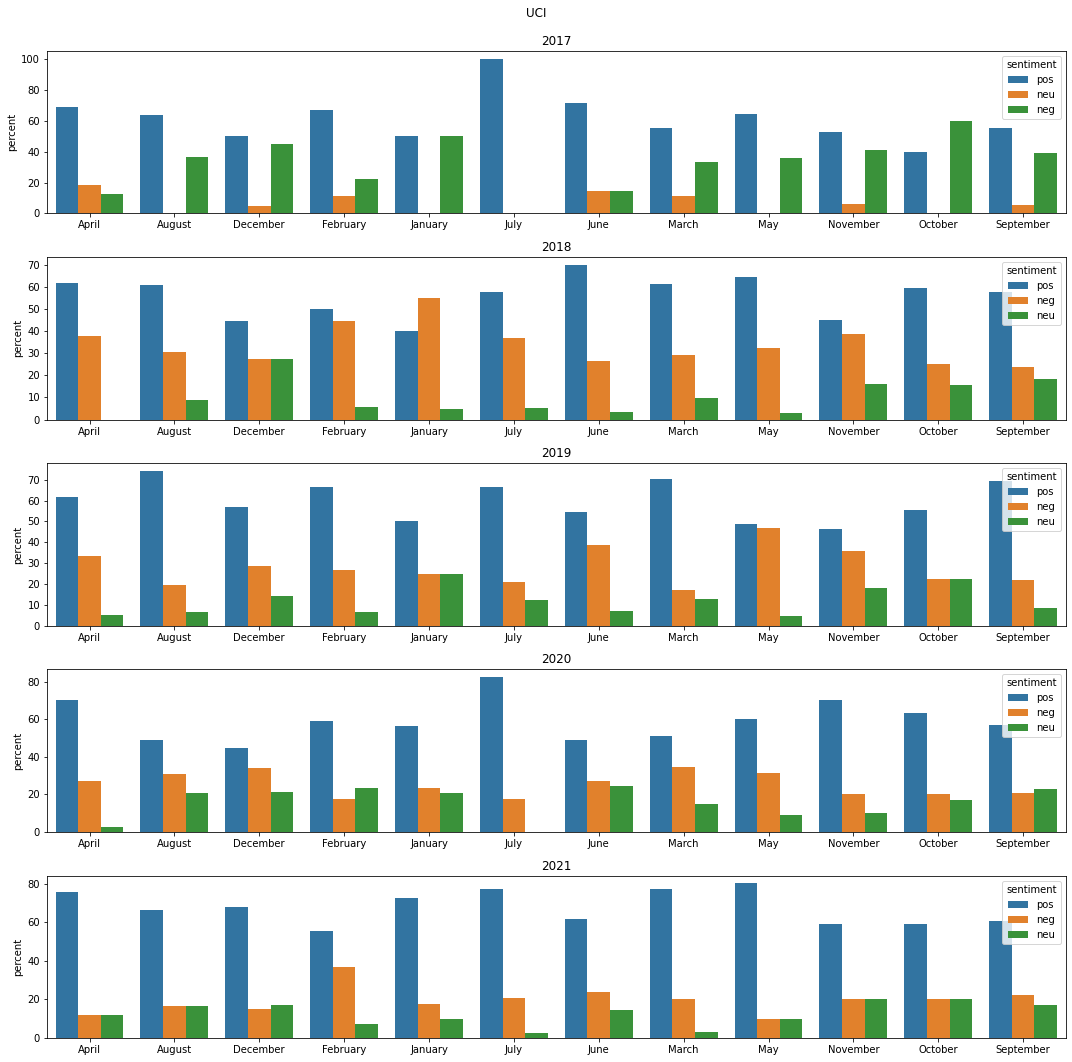

In [16]:
countplot_per_year_per_uni('UCI', uci)
countplot_per_month_per_year_per_uni('UCI', uci, pcr=False)

## $$UCLA$$

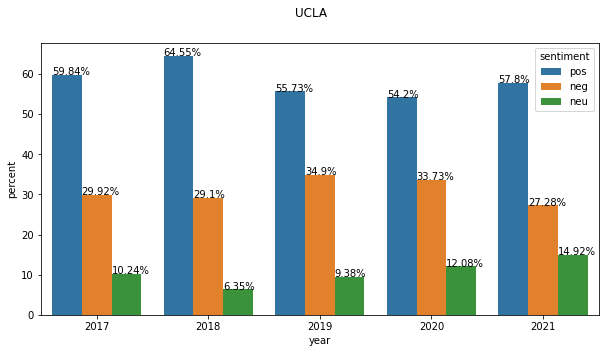

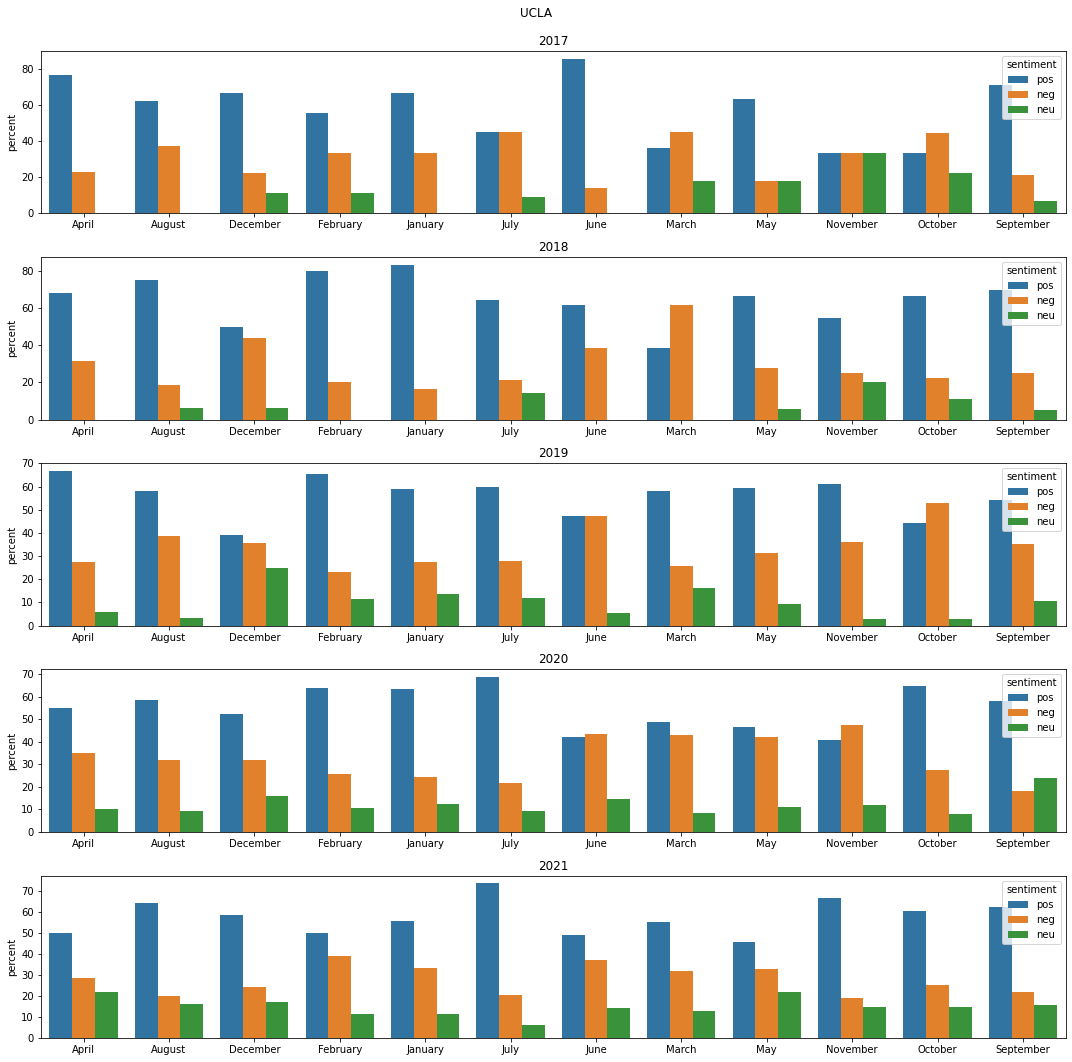

In [19]:
countplot_per_year_per_uni('UCLA', ucla)
countplot_per_month_per_year_per_uni('UCLA', ucla, pcr=False)


## $$UCSANTABARBARA$$

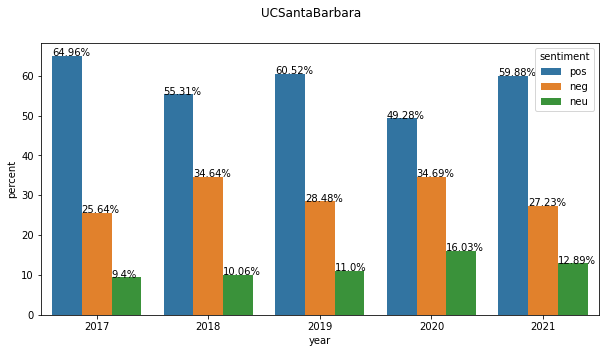

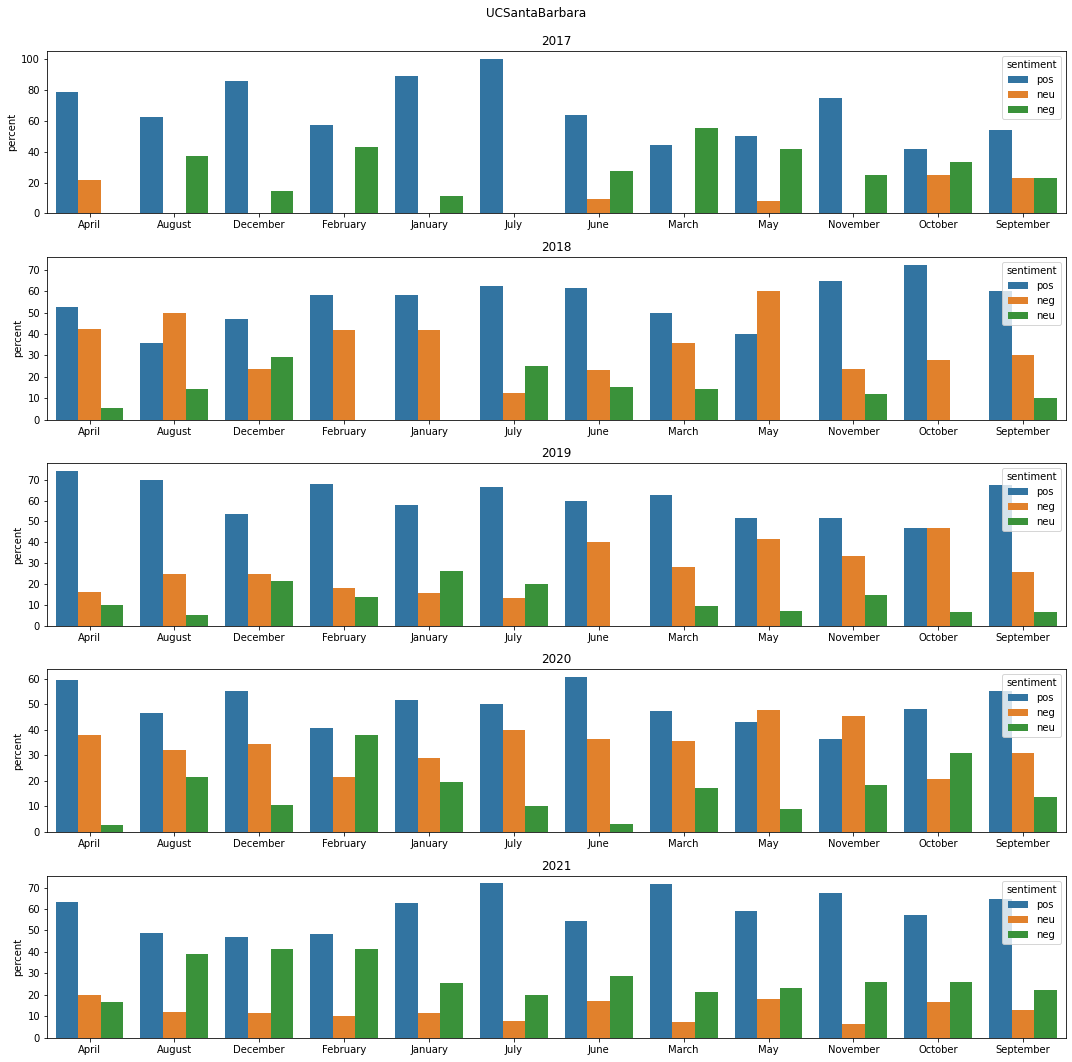

In [21]:
countplot_per_year_per_uni('UCSantaBarbara', ucsantabarbara)
countplot_per_month_per_year_per_uni('UCSantaBarbara', ucsantabarbara, pcr=False)


## $$UCSC$$

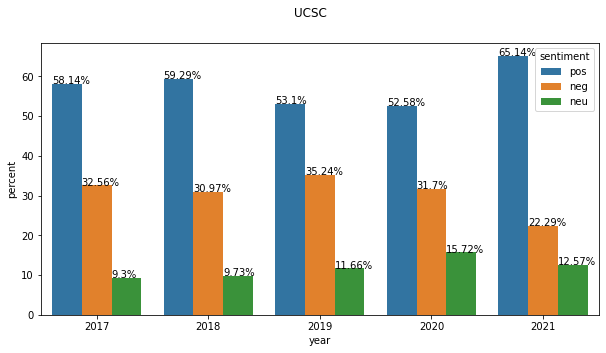

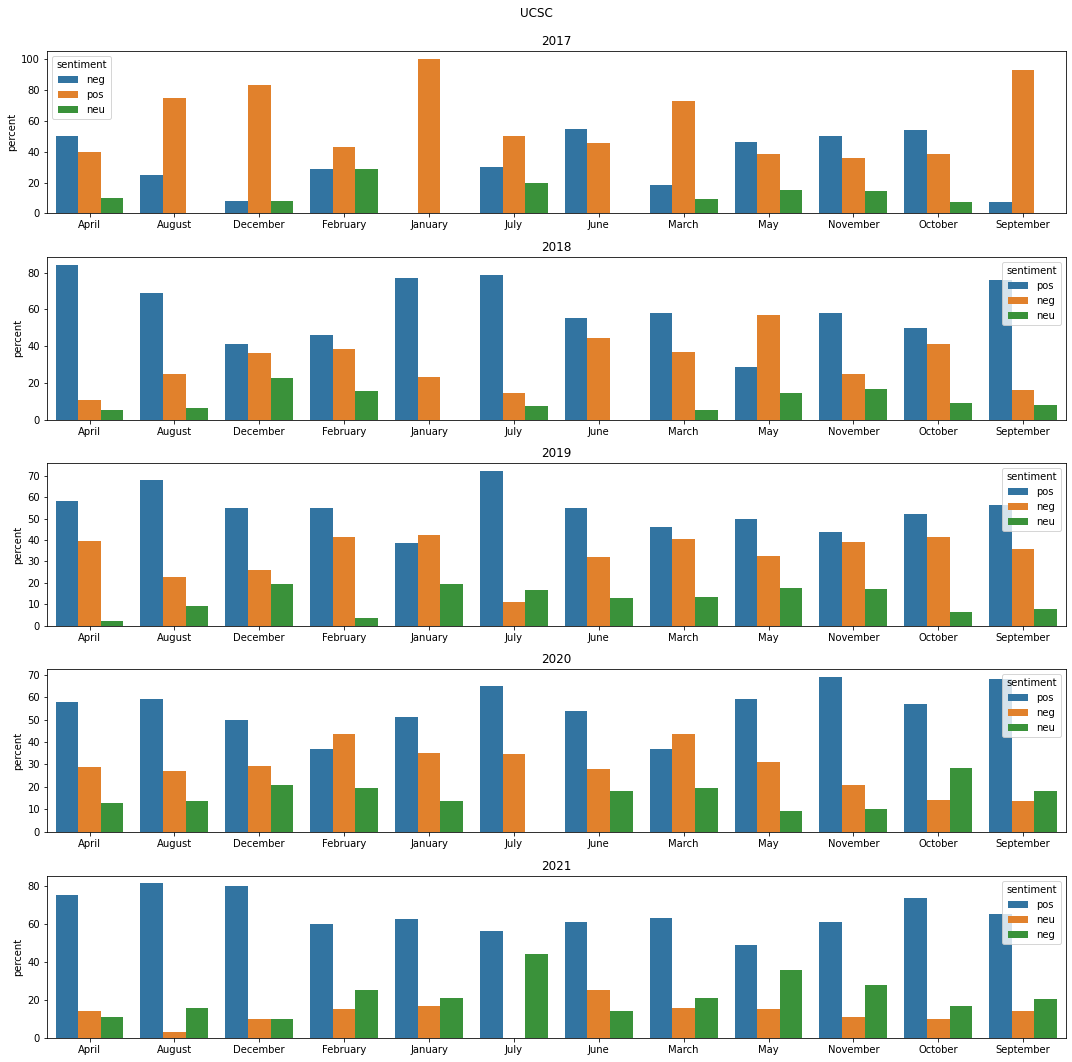

In [22]:
countplot_per_year_per_uni('UCSC', ucsc)
countplot_per_month_per_year_per_uni('UCSC', ucsc, pcr=False)


## $$UCSD$$

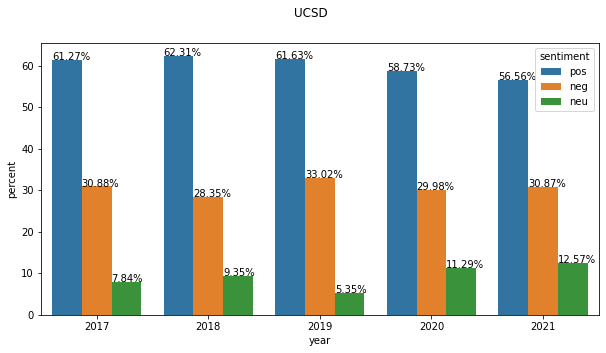

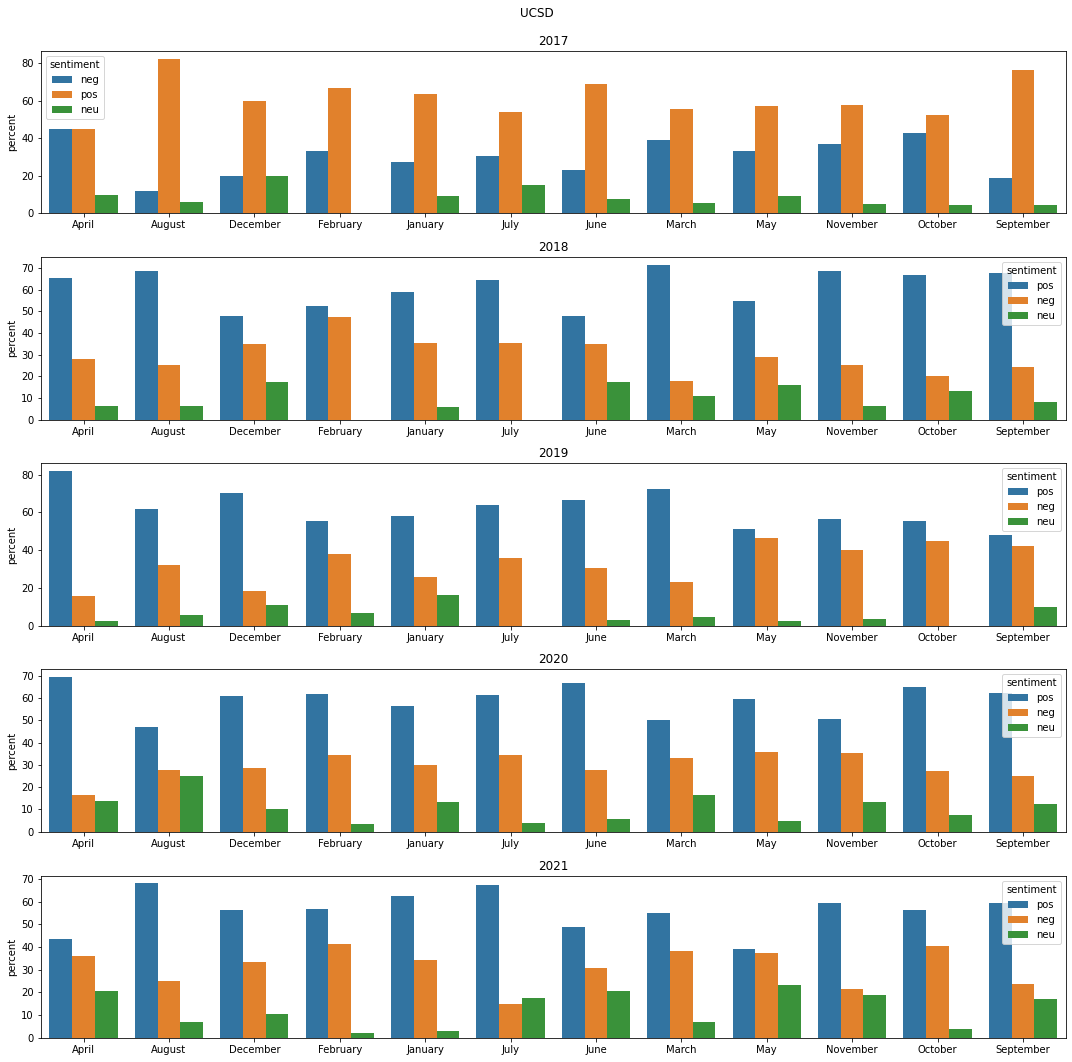

In [23]:
countplot_per_year_per_uni('UCSD', ucsd)
countplot_per_month_per_year_per_uni('UCSD', ucsd, pcr=False)


## $$UDUB$$

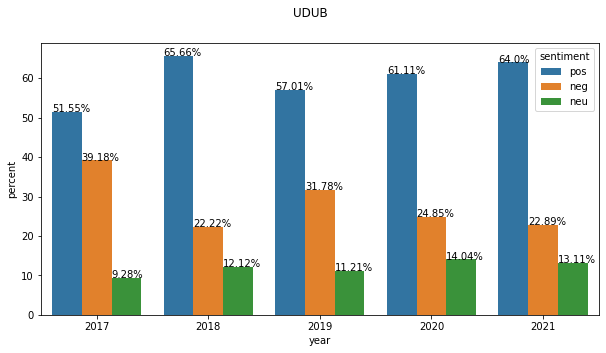

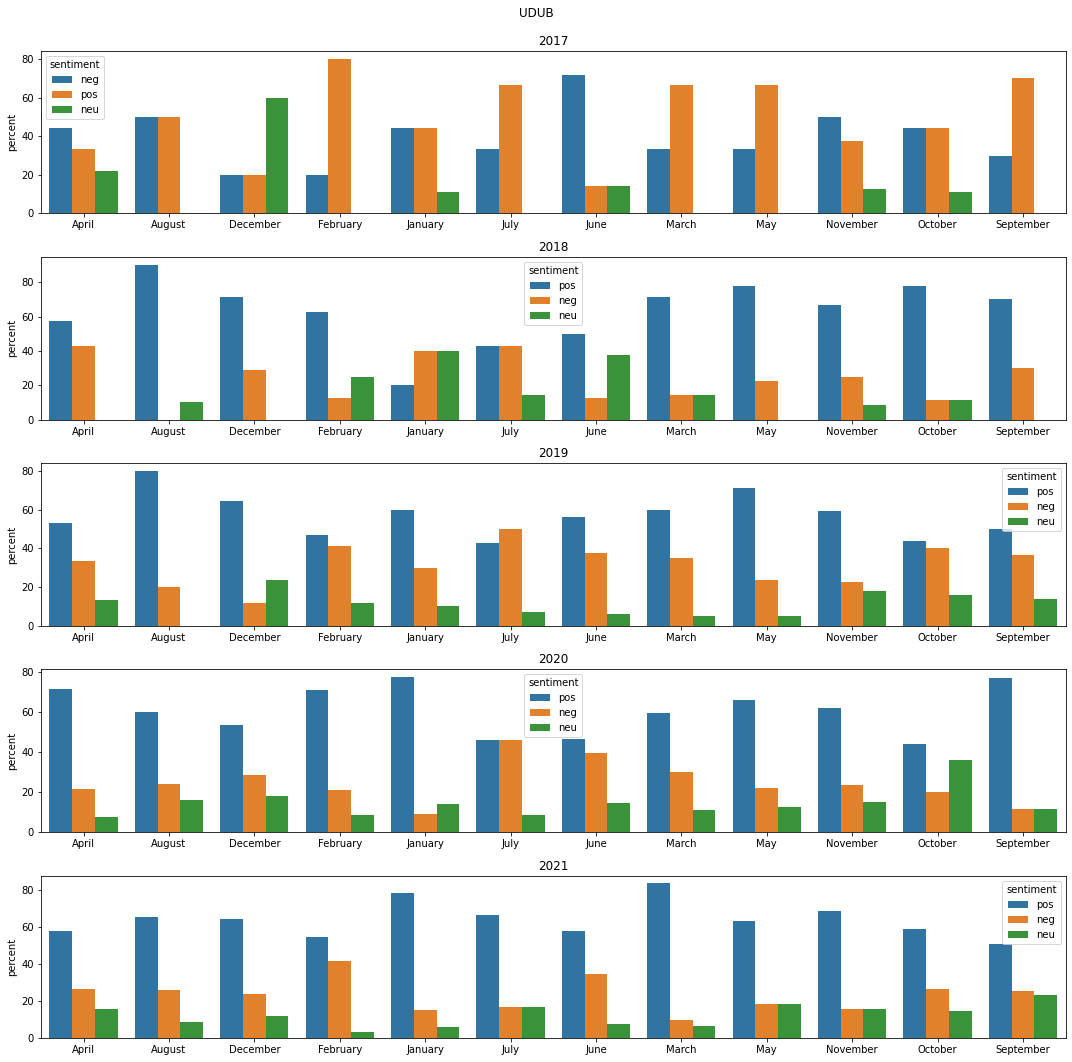

In [24]:
countplot_per_year_per_uni('UDUB', udub)
countplot_per_month_per_year_per_uni('UDUB', udub, pcr=False)


## $$UOFM$$

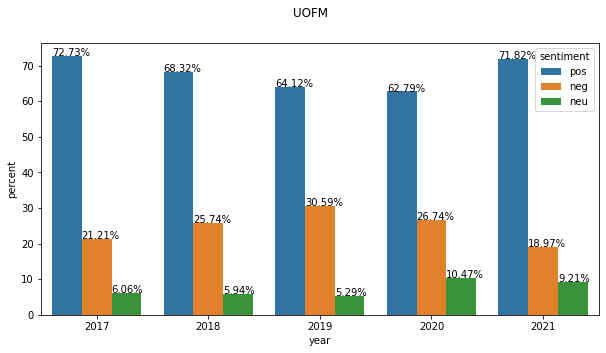

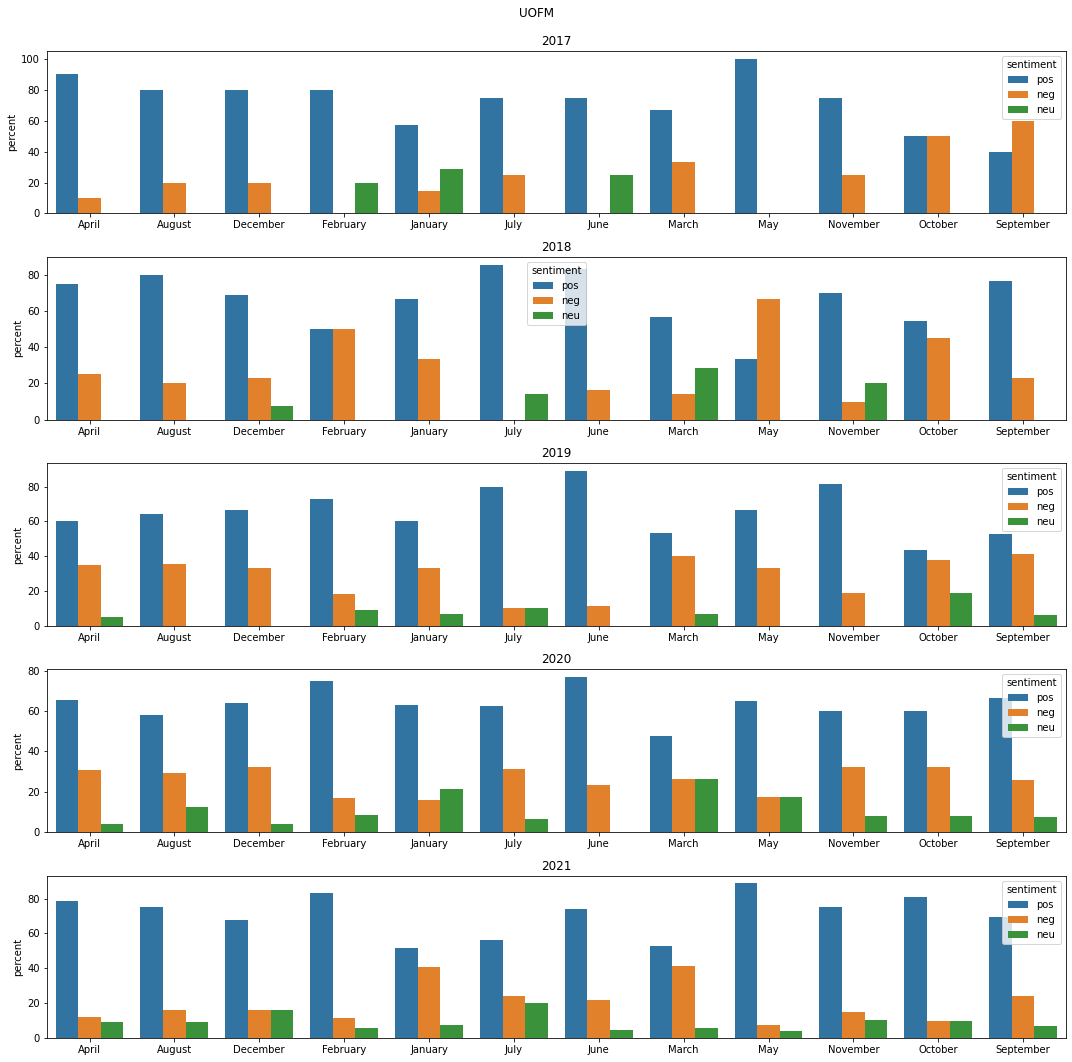

In [25]:
countplot_per_year_per_uni('UOFM', uofm)
countplot_per_month_per_year_per_uni('UOFM', uofm, pcr=False)

## $$UTAUSTIN$$

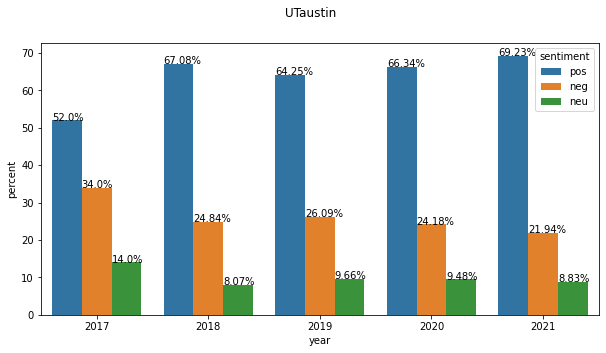

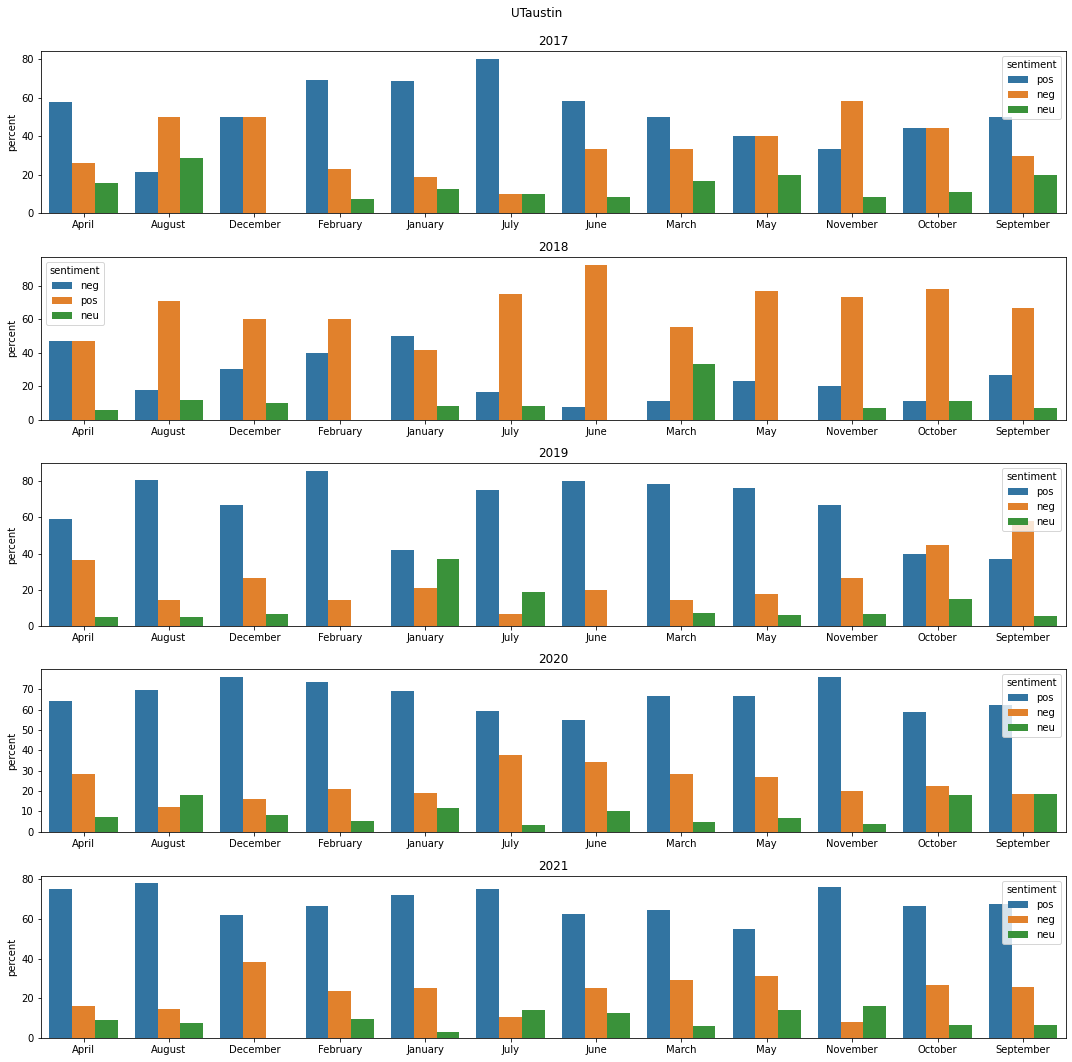

In [26]:
countplot_per_year_per_uni('UTaustin', utaustin)
countplot_per_month_per_year_per_uni('UTaustin', utaustin, pcr=False)

The data illustrates the analytical relationship between 24 universities.

As a private data: Boston, Brown, Columbia, Georgetown, Harvard, Massachusetts, Notre Dame, Stanford, Syracuse, Pennsylvania, University of Southern California, and Yale.

As a public data: Florida State University, Georgia Institute of Technology, Penn State University, University of California Davis, University of California Irvine, University of California Los Angeles, University of California Santa Barbara, University of California Santa Cruz, University of California San Diego, University of Washington, University of Michigan, and The University of Texas at Austin.

The analysis aims to show the relationship between student commentary on Reddit regarding sentiment and explain the relationship between the score and the number of comments for each of them. We have used the lambda relationship to illustrate it on the graphs.

- If score\ number of comments is a positive value, we will denote it with pos, which is positive, and it will be blue. 

- If score\ number of comments is a negative value, we will tell it with neu, which is negative, and it will be orange. 

- In the case of equality, it will be neutralized with neu, and it will be green. 


The analysis will be for five years of comments from students and their explanations on the graph.
We can find that for each university, the data was divided in one batch into five years, and the analysis was also divided into each year. The data shows varying percentages of positive, negative, and neutral sentiment across the schools in coordination with the numbers of posts, time of year posted, etc. Some examples in variation from the data contained show in the University of Georgetown there is no tie in the first three years, due to the lack of increase in the number of comments on the score. As for Brown University, the number of titles was equal to 143 more than Georgetown University, and the score was somewhat high. Accordingly, we will notice that there is a neutralization in all years. As for Syracuse University, the title count was 283. And we conclude that the score has always been high, and the negative percentage and the neutralization were not high because of the continuous interaction. Overall, positive sentiment dominated over both negative sentiment—approximately 40% difference between pos and negative across the board—and neutral sentiment— approximately 60% difference between positive and neutral across the board—during all five years at both public and private universities. The data also shows a gradual increase in positive sentiment during the time COVD-19 affected schooling as well as a slight decrease in negative sentiment during the 2020/2021 school years as well.
